# Project - Time Series Forecasting (Sparkling Wine)

### Basic python packages loaded

In [11]:
##Import the requred libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

# Problem Statement 1:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv 

### Data Ingestion:

### 1. Read the data as an appropriate Time Series data and plot the data.


In [12]:
#Creating pandas df
df = pd.read_csv("Sparkling.csv",parse_dates = True, index_col = 0)

In [13]:
# Check top few records to get a feel of the data structure
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

### Exploratory Data Analysis:

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [14]:
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

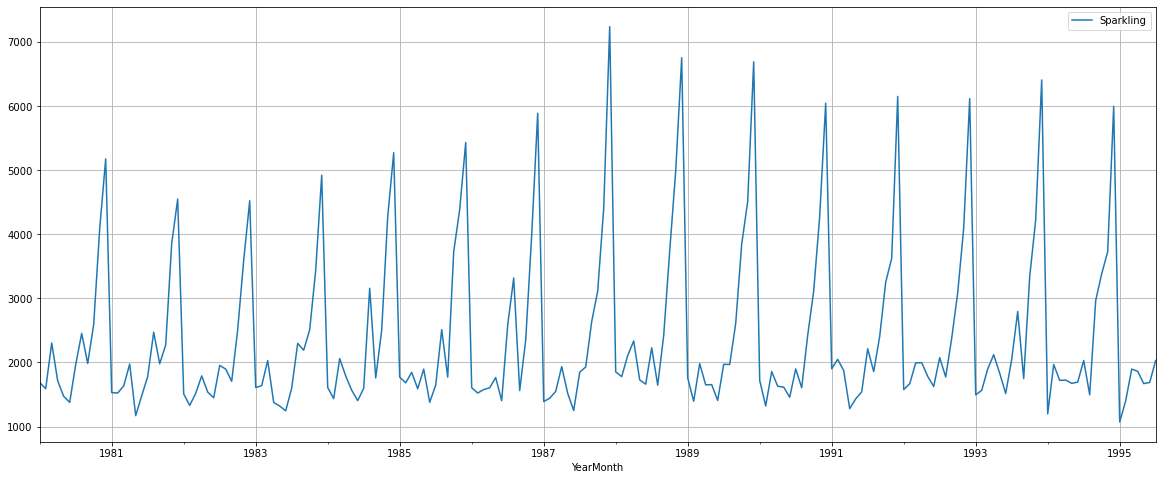

In [15]:
df.plot()
plt.grid();

We can see there is no trend but a seasonal pattern is associated with it.

In [16]:
# Checks the number of rows and columns
row, col = df.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 187 rows and 1 columns in the dataset


In [17]:
# Checking the basic measures of descriptive statistics
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

#### Inference:
The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

In [18]:
#Data type of data features
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [19]:
# Checks if any value in the dataframe is null.
a = df.isnull().values.sum()
print("There are {}" .format(a), "null values present in the dataset")

There are 0 null values present in the dataset


In [20]:
df.isnull().sum() 

Sparkling    0
dtype: int64

#### Inference:
- There are no missing values present.

In [21]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 11


Sparkling
YearMonth            
1984-01-01       1609
1985-09-01       1771
1986-02-01       1523
1987-05-01       1518
1988-08-01       1645
1990-08-01       1605
1992-01-01       1577
1994-02-01       1968
1994-03-01       1720
1995-03-01       1897
1995-07-01       2031

#### Yearly Boxplot

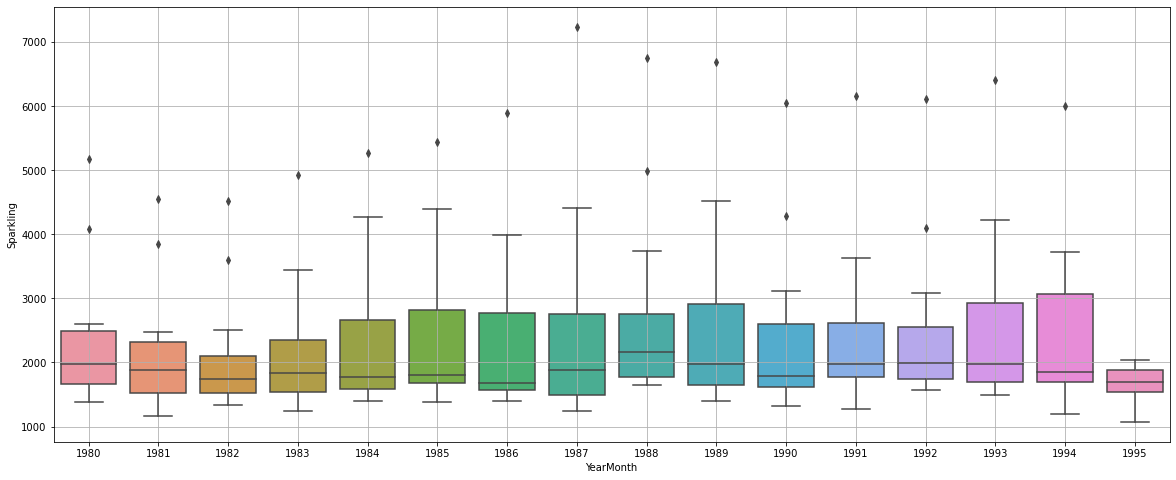

In [22]:
sns.boxplot(x = df.index.year, y = df['Sparkling'])
plt.grid();

The yearly boxplots also shows that the Sparkling wine sales have stable or stationary output for 16 years.

#### Monthly Plot

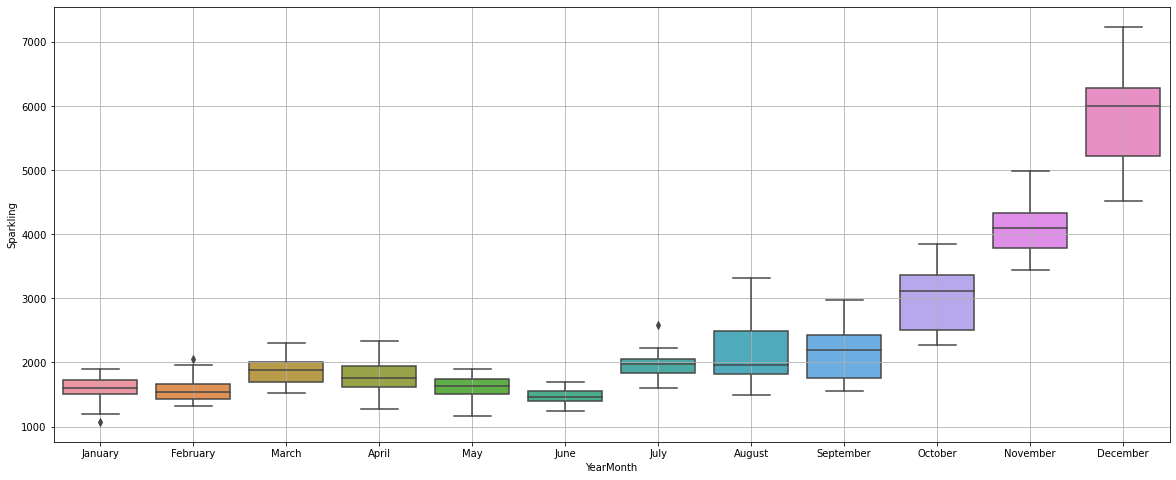

In [23]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

There is a clear distinction of 'Sparkling wine sales' within different months spread across various years. The highest such numbers are being recorded in the month of November and December across various years.

### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

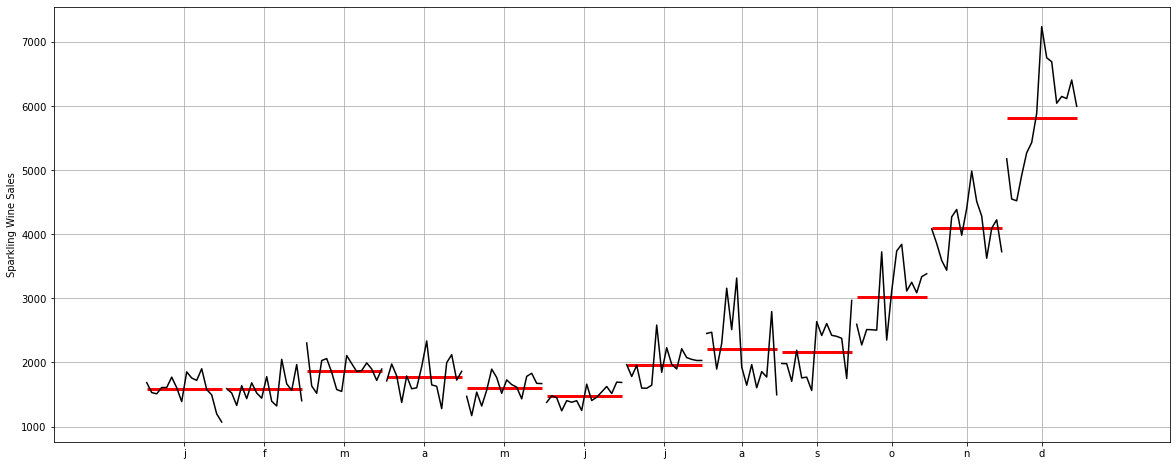

In [24]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sparkling Wine Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling Wine' in this case) across various months. The red line is the median value.

### Plot a graph of monthly Sparkling Wine Sales across years.

In [25]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

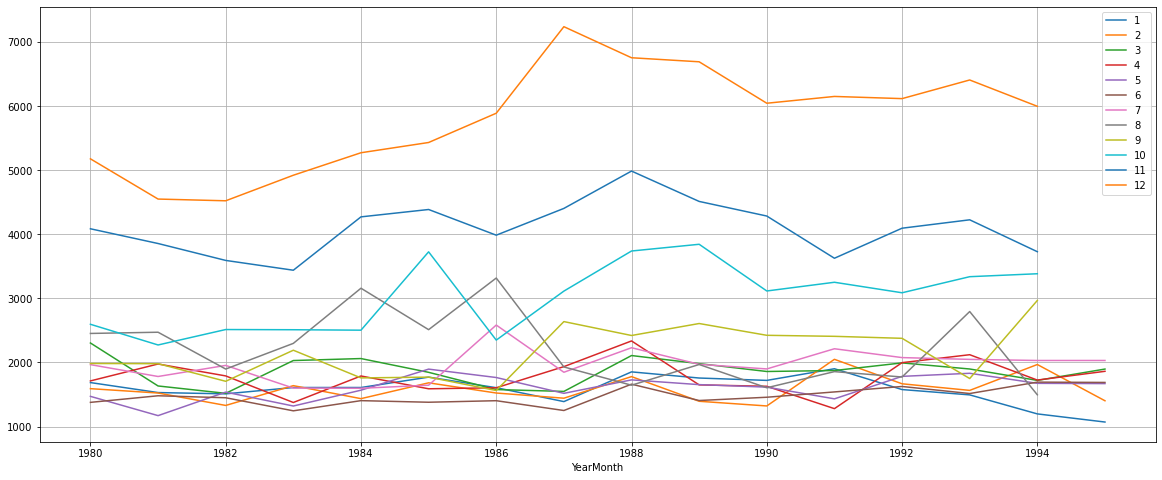

In [26]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Plot the Empirical Cumulative Distribution.

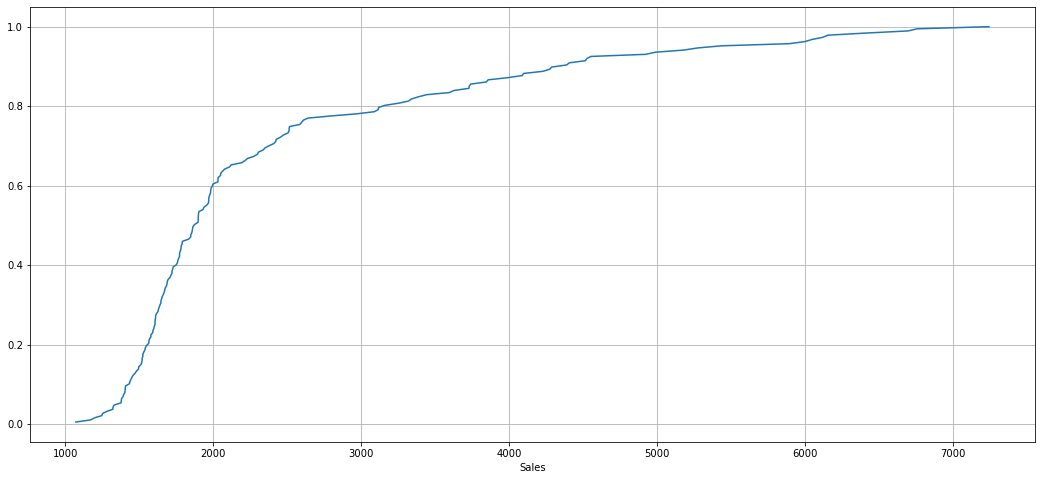

In [27]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

### Plot the average Sparkling Wine Sales per month and the month on month percentage change of Sparkling Wine Sales.

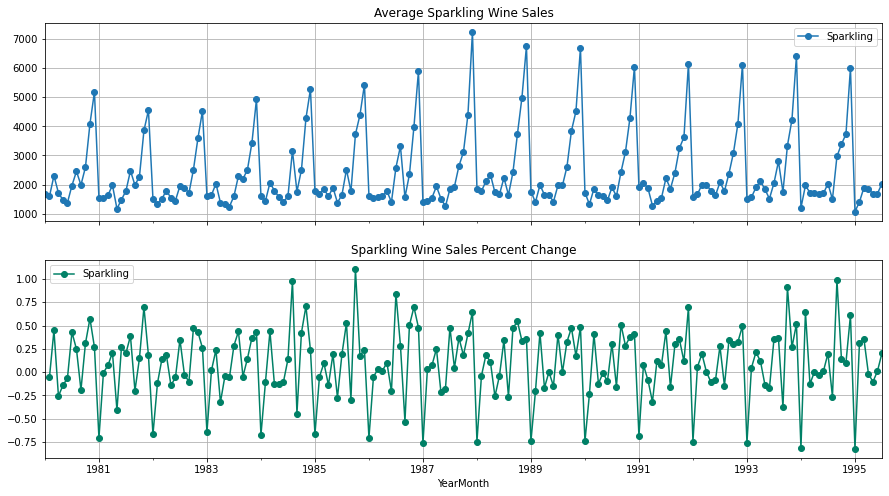

In [28]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sparkling Wine Sales' and the Percentage change of 'Sparkling Wine Sales' with respect to the time.

### Decompose the Time Series and plot the different components.

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Decomposition

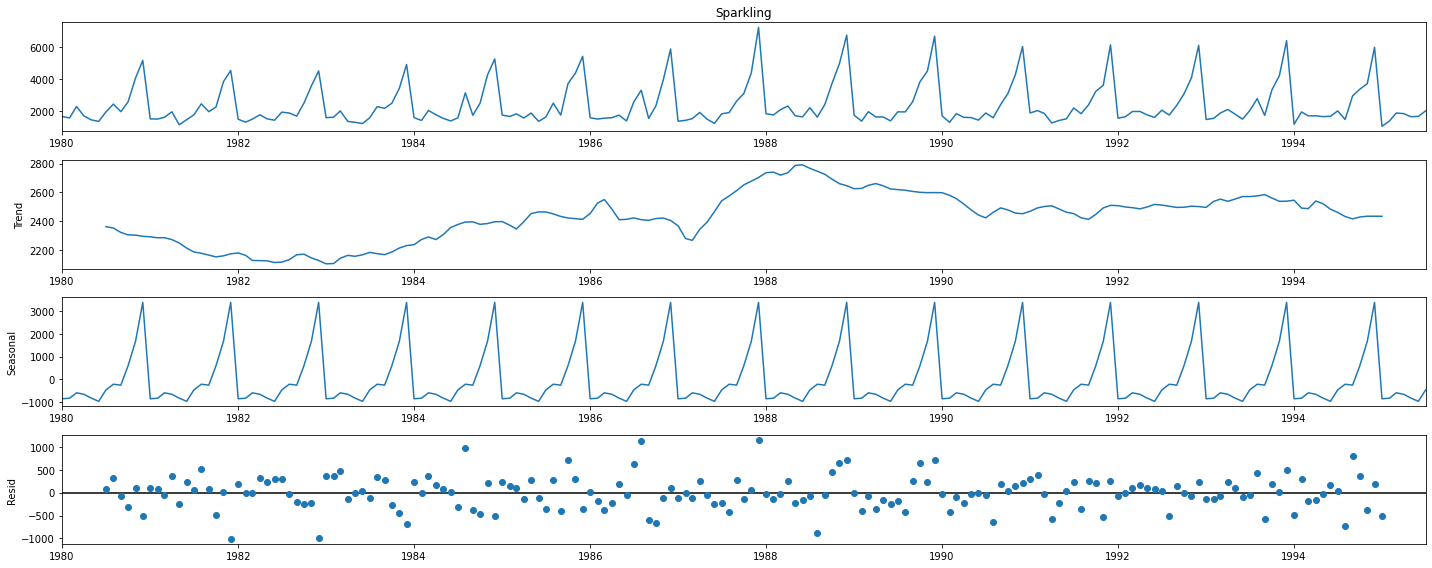

In [30]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

We see that the residuals are not located only around 0 from the plot of the residuals in the decomposition.Therefore we go for multiplicative decomposition.

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


### Multiplicative Decomposition

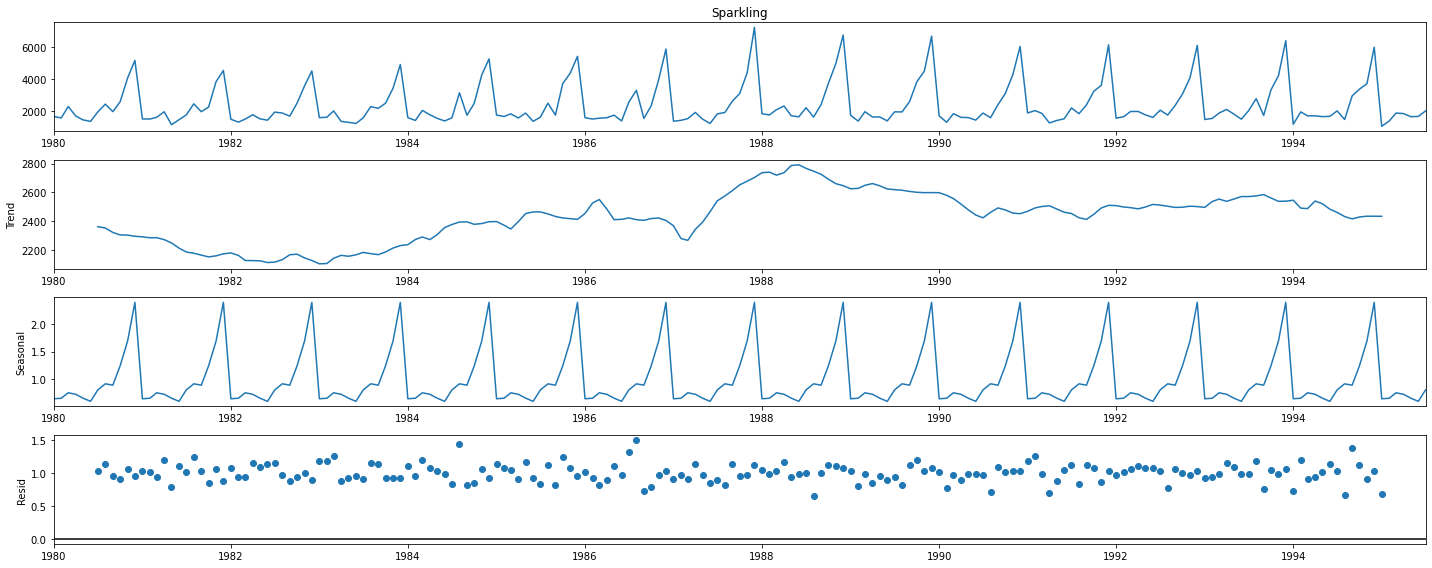

In [32]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Check for stationarity of the whole Time Series data.

In [34]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

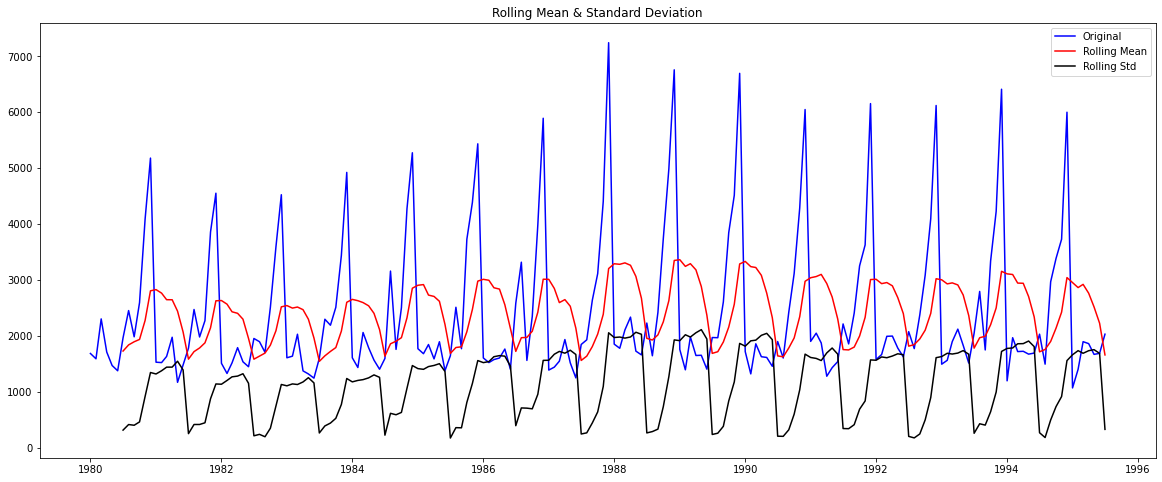

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [35]:
test_stationarity(df['Sparkling'])

### Inference:
We see that at 5% significant level the Time Series is non-stationary.
Let us take a difference of order 1 and check whether the Time Series is stationary or not.

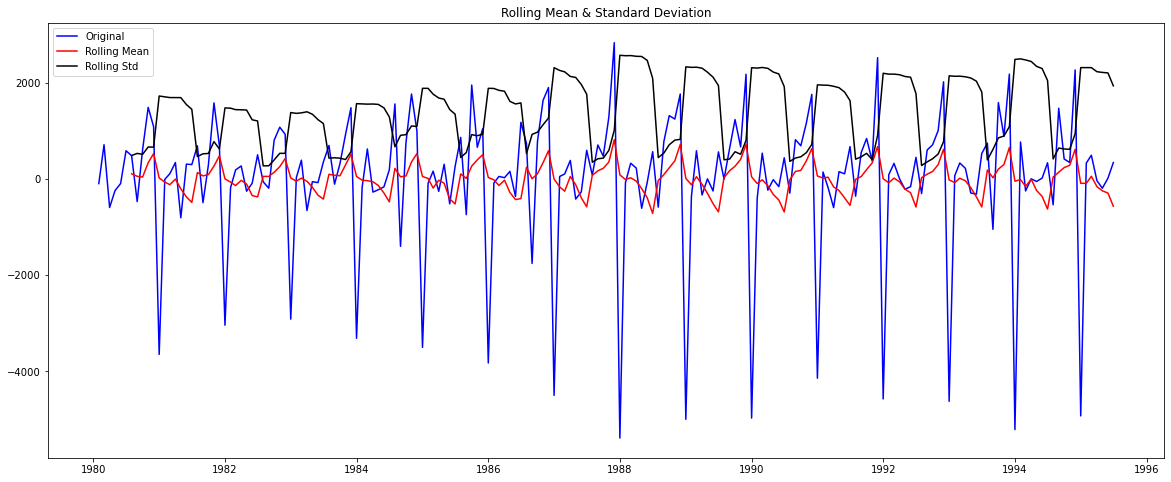

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [36]:
# Taking a difference of order 1 
test_stationarity(df['Sparkling'].diff().dropna())

### Inference:
- Perfect! Our series now looks like something undescribable, oscillating around zero. The Dickey-Fuller test indicates that it is stationary, and the number of significant peaks in ACF has dropped. We can finally start modeling! 
- We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

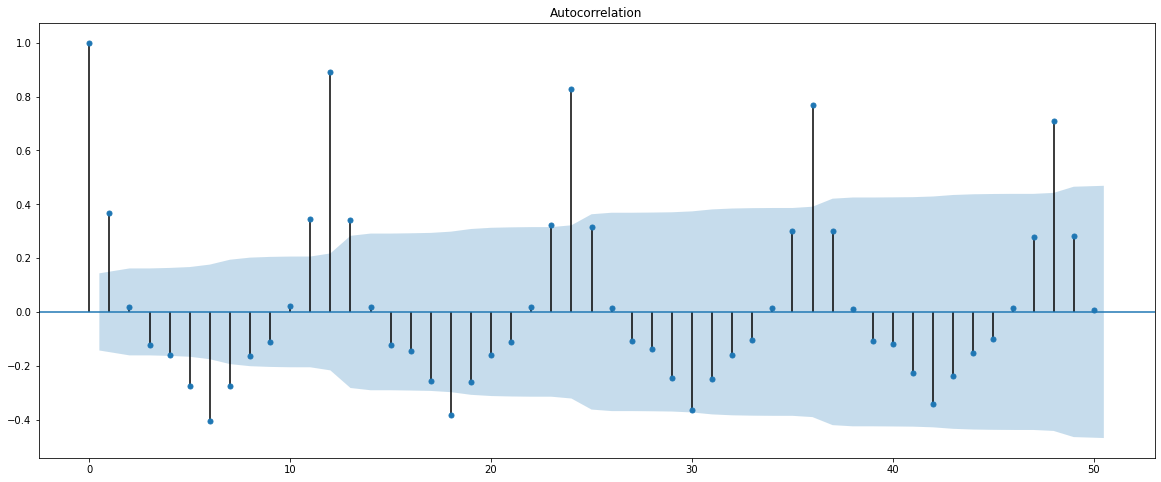

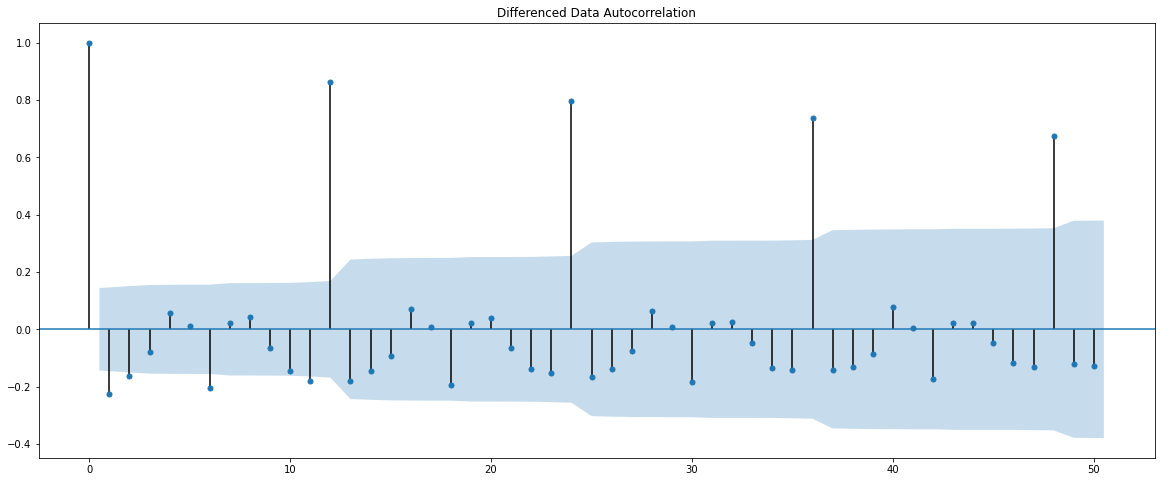

In [38]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### We get the order of MA term or 'q' from ACF plot. Here the order of MA term is 2 from the differenced ACF plot

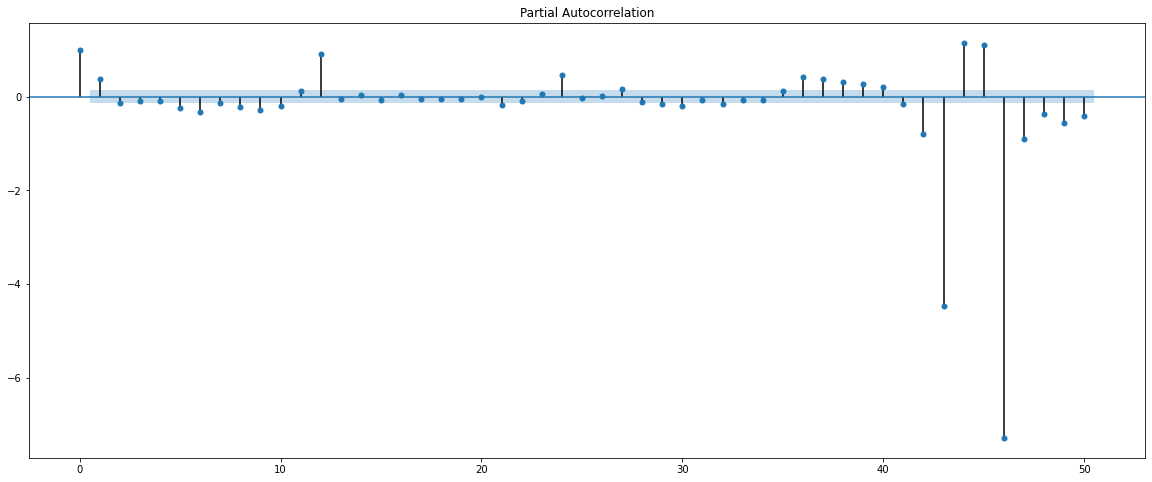

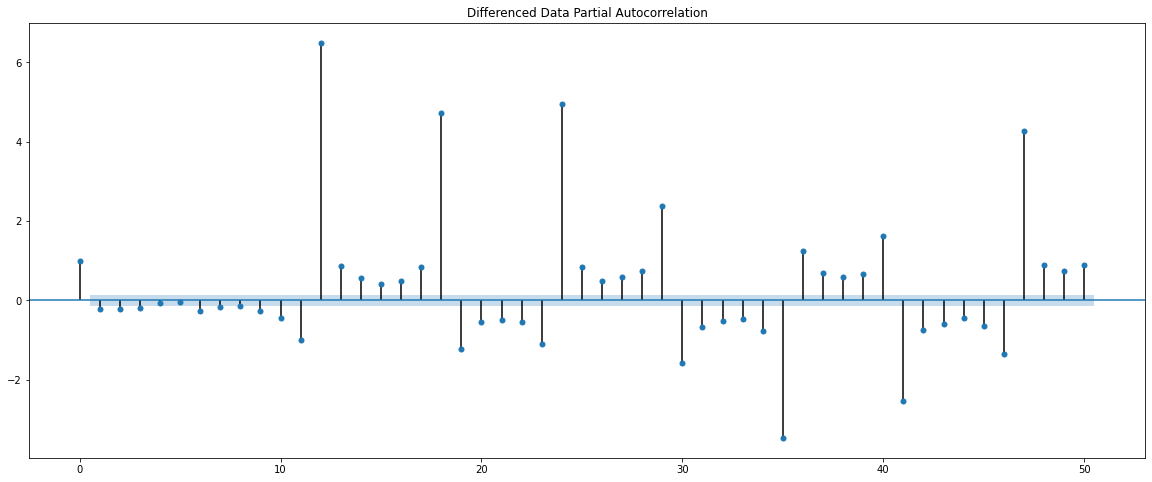

In [39]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### We get the order of AR term or 'p' from PACF plot. Here the order of AR term is (2,3) from the differenced PACF plot. From the above plots, we can also say that there seems to be a seasonality in the data.

### 3. Split the data into training and test. The test data should start in 1991.

### Train-Test Split

- Training Dataset: The sample of data used to fit the model.
- Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

- Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [40]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [41]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [42]:
print('First few rows of Training Data')
display(train.head())

print('Last few rows of Training Data')
display(train.tail())

print('First few rows of Test Data')
display(test.head())

print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [43]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Modelling:

### Method 1: Regression on Time

In [44]:
df1         = df.copy() # Make a copy
time        = [i+1 for i in range(len(df))]
df1['time'] = time

df1.head(5)

Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

In [45]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [46]:
x_train = train.drop('Sparkling', axis=1)
x_test  = test.drop('Sparkling', axis=1)
y_train = train[['Sparkling']]
y_test  = test[['Sparkling']]

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

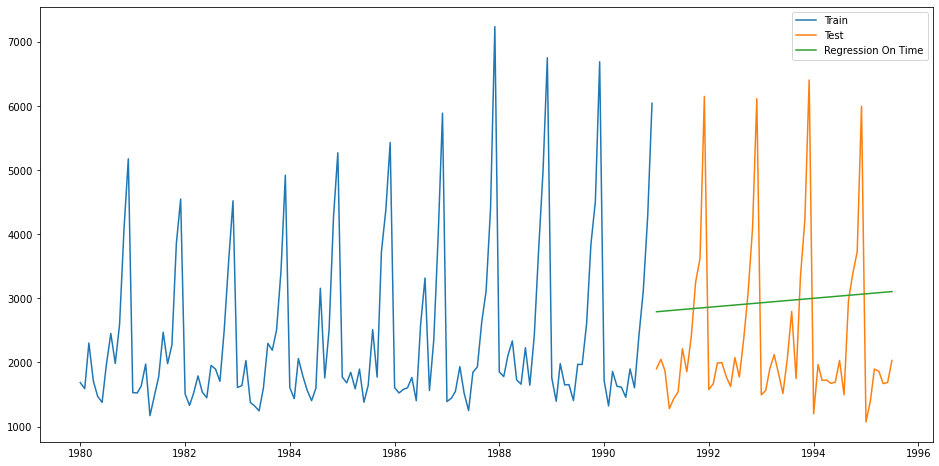

In [49]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [50]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [51]:
from math  import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTime))
RMSE = round(rmse, 3)
MAPE_ROT = MAPE(test.Sparkling, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(RMSE, MAPE_ROT))

For RegressionOnTime,  RMSE is 1389.135 MAPE is 50.15


In [52]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'RMSE': [RMSE], 'MAPE' : [MAPE_ROT]})
resultsDf

Method      RMSE   MAPE
0  RegressionOnTime  1389.135  50.15

### Method 2: Regression on Time With Seasonal Components

In [53]:
df1 = df.copy()
df1.drop(df1.index[186],inplace=True)
time = [i+1 for i in range(len(df1))]
df1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [54]:
df1['time'] = time
print(df1.head())
print(df1.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']#defining the 12 
#months

            Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5
186


In [55]:
df1['monthSeasonality'] = monthSeasonality * 3
df1.head()

ValueError: Length of values does not match length of index

In [56]:
#monthDf = df1[['Month']]
#df1.drop('Month', axis=1, inplace=True)

In [57]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(2).T

YearMonth  1980-01-01  1980-02-01
Sparkling        1686        1591
time                1           2

In [58]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]
x_train = train.drop('Sparkling', axis=1)
x_test  = test.drop('Sparkling', axis=1)
y_train = train[['Sparkling']]
y_test  = test[['Sparkling']]

In [59]:
model   = LinearRegression()

In [60]:
model.fit(x_train, y_train)

LinearRegression()

In [61]:
predictions = model.predict(x_test)

In [62]:
y_test['RegOnTimeSeasonal'] = predictions

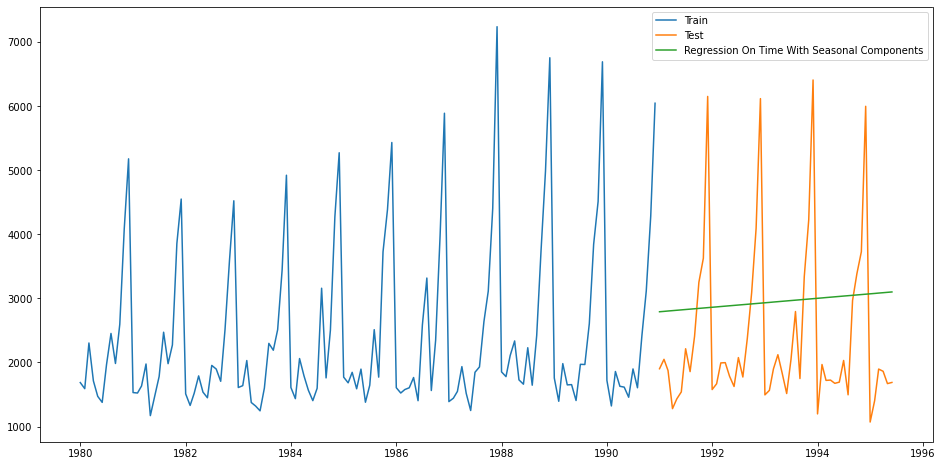

In [63]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [64]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTimeSeasonal))
RMSE = round(rmse, 3)
MAPE_ROTS = MAPE(test.Sparkling, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(rmse, MAPE_ROTS))

For RegOnTimeSeasonal,  RMSE is 1394.276 MAPE is 50.11


In [65]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'RMSE': [RMSE], 'MAPE' : [MAPE_ROTS]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method      RMSE   MAPE
0          RegressionOnTime  1389.135  50.15
0  RegressionOnTimeSeasonal  1394.276  50.11

### Method 3: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

In [66]:
dd= np.asarray(train.Sparkling)

In [67]:
y_hat = test.copy()

In [68]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

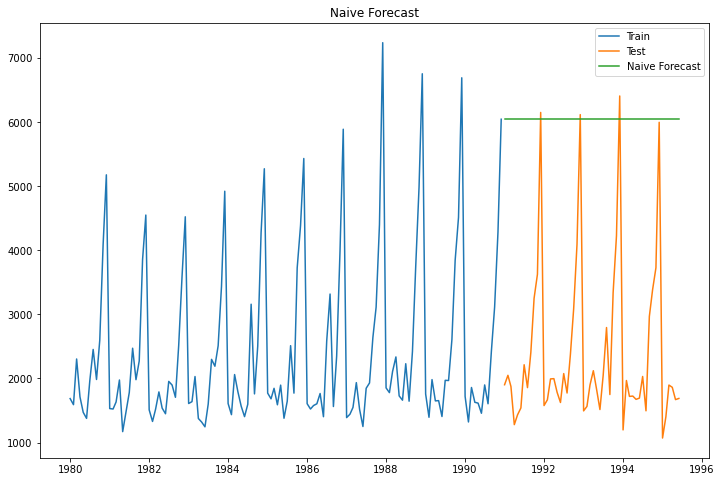

In [69]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sparkling'], label='Train')
plt.plot(test.index,test['Sparkling'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [70]:
rmse = rmse = sqrt(mean_squared_error(test.Sparkling, y_hat.naive))
rmse = round(rmse, 3)
MAPE_Naive_model = MAPE(test.Sparkling, y_hat.naive)
print('For Naive model, RMSE:',rmse)
print('For Naive model, MAPE:',MAPE_Naive_model)

For Naive model, RMSE: 3861.413
For Naive model, MAPE: 152.17


In [71]:
tempResultsDf = pd.DataFrame({'Method':['Naive_model'], 'RMSE': [rmse], 'MAPE' : [MAPE_Naive_model]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method      RMSE    MAPE
0          RegressionOnTime  1389.135   50.15
0  RegressionOnTimeSeasonal  1394.276   50.11
0               Naive_model  3861.413  152.17

#### Inference:
- We can infer from the RMSE and MAPE values and the graphs above, that Naive method and Regression on Time With Seasonal Components model are not suited for datasets with high variability.

- Naive method is best suited for stable datasets. We can still improve our score by adopting different techniques.

- Now we will look at another technique and try to improve our score.

### Method 4: Simple Average

In [72]:
y_hat_avg = test.copy()

In [73]:
y_hat_avg['avg_forecast'] = train['Sparkling'].mean()

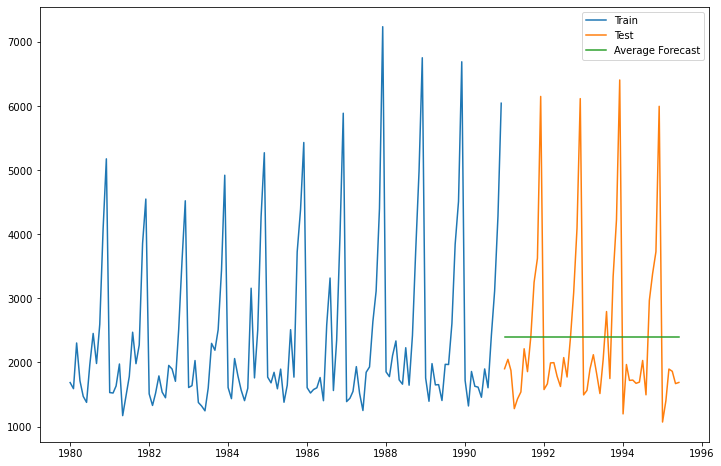

In [74]:
plt.figure(figsize=(12,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [75]:
rmse = rmse = sqrt(mean_squared_error(test.Sparkling, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
MAPE_Simple_Average = MAPE(test.Sparkling, y_hat_avg.avg_forecast)
print('For Simple Average model, RMSE:',rmse)
print('For Simple Average model, MAPE:',MAPE_Simple_Average)

For Simple Average model, RMSE: 1285.834
For Simple Average model, MAPE: 39.22


In [76]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'RMSE': [rmse], 'MAPE' : [MAPE_Simple_Average]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method      RMSE    MAPE
0          RegressionOnTime  1389.135   50.15
0  RegressionOnTimeSeasonal  1394.276   50.11
0               Naive_model  3861.413  152.17
0            Simple Average  1285.834   39.22

### Inference

We can see that this model has improved our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. The score of Average method is better than Naive method. We should move step by step to each model and confirm whether it improves our model or not.

### Method 5: Moving Average (MA)

In [77]:
df1 = df.copy()

In [78]:
df1['moving_avg_forecast_4']  = df['Sparkling'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df['Sparkling'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df['Sparkling'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df['Sparkling'].rolling(12).mean()

For Moving Average model, moving_avg_forecast_4  RMSE is 1156.590 MAPE is 35.96
For Moving Average model, moving_avg_forecast_6  RMSE is 1283.927 MAPE is 43.86
For Moving Average model, moving_avg_forecast_8  RMSE is 1342.568 MAPE is 46.46
For Moving Average model, moving_avg_forecast_12  RMSE is 1267.925 MAPE is 40.19


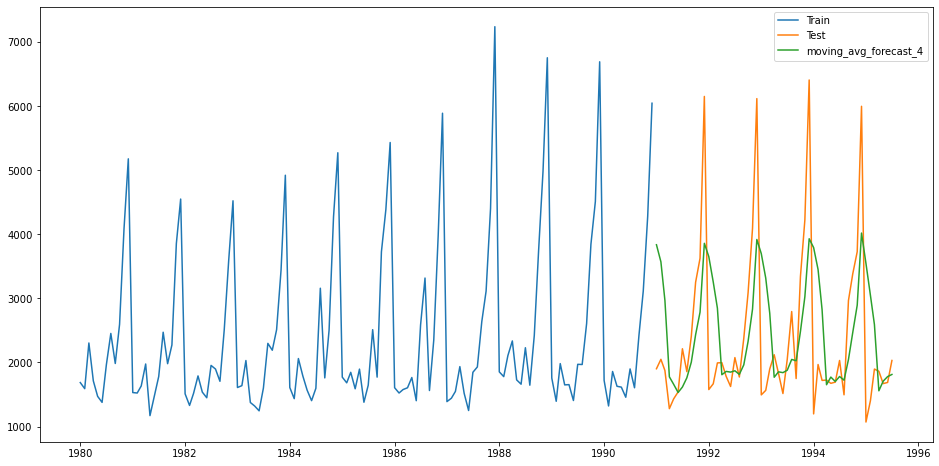

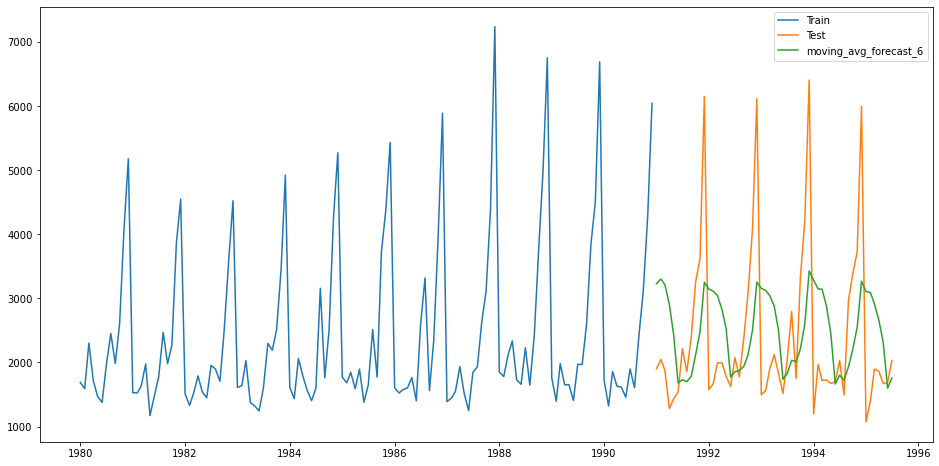

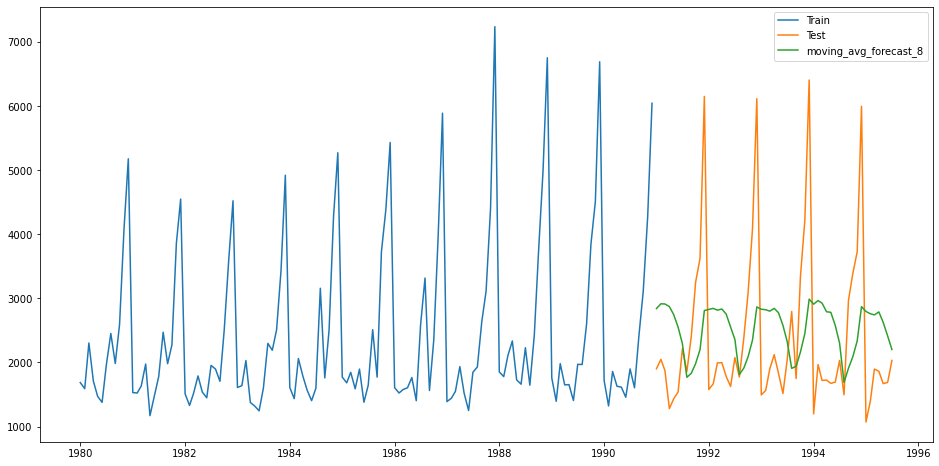

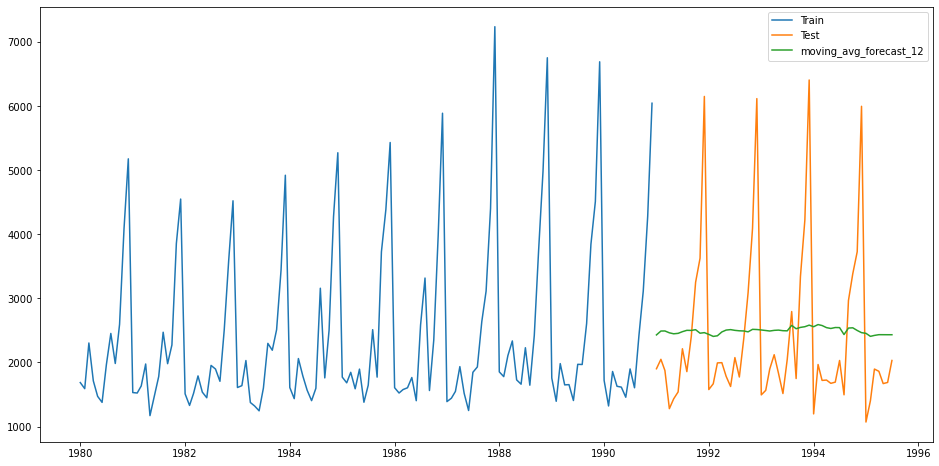

In [79]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Sparkling'], label='Train')
    plt.plot(test['Sparkling'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Sparkling, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Sparkling, y_hat_avg[col_name])
    print("For Moving Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    
    #Defining the data frame with the model evaluation parameters

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'RMSE': [rmse], 'MAPE' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [80]:
resultsDf

Method      RMSE    MAPE
0          RegressionOnTime  1389.135   50.15
0  RegressionOnTimeSeasonal  1394.276   50.11
0               Naive_model  3861.413  152.17
0            Simple Average  1285.834   39.22
0     moving_avg_forecast_4  1156.590   35.96
0     moving_avg_forecast_6  1283.927   43.86
0     moving_avg_forecast_8  1342.568   46.46
0    moving_avg_forecast_12  1267.925   40.19

### Method 6: Simple Exponential Smoothing

In [81]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [82]:
# create class
model = SimpleExpSmoothing(train['Sparkling'])

In [83]:
model_fit = model.fit(optimized = True)

In [84]:
print('')
print('== Simple Exponential Smoothing Parameters == ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing Parameters == 


Smoothing Level 0.0
Initial Level 2403.7936



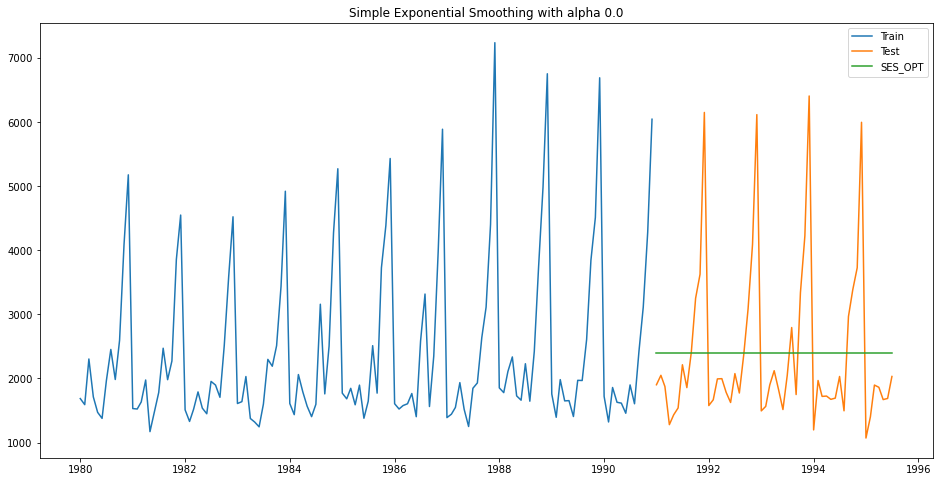

In [85]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Sparkling']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Sparkling'], label = 'Train')
plt.plot(test.index, test['Sparkling'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [86]:
rmse_opt =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg.SES))
mape_opt =  MAPE(test['Sparkling'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.00,  RMSE is 1275.0819 MAPE is 38.90


In [87]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE    MAPE
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal  1394.276000   50.11
0               Naive_model  3861.413000  152.17
0            Simple Average  1285.834000   39.22
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081852   38.90

### Method 7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [88]:
import statsmodels.api as sm

In [89]:
y_hat_avg = test.copy()

In [90]:
model_fit = Holt(np.asarray(train['Sparkling'])).fit()

In [91]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [92]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.6478
Smoothing Slope 0.0
Initial Level 1686.0838



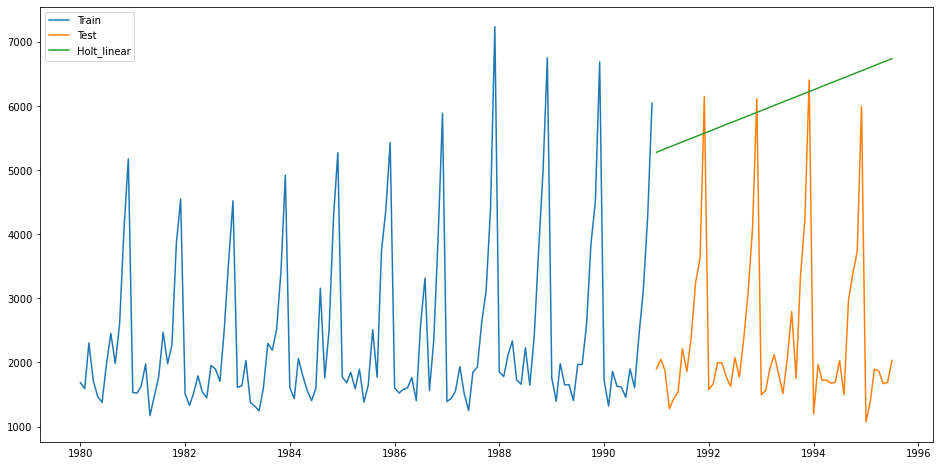

In [93]:
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [94]:
rmse_opt =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_linear']))
mape_opt =  MAPE(test['Sparkling'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.65,  RMSE is 3851.3012 MAPE is 152.07


In [95]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_linear', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE    MAPE
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal  1394.276000   50.11
0               Naive_model  3861.413000  152.17
0            Simple Average  1285.834000   39.22
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081852   38.90
0               Holt_linear  3851.301168  152.07

### Method 8: Holt-Winters Method - Additive seasonality

In [96]:
y_hat_avg = test.copy()

In [97]:
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [98]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

#### Plot the predicted Time Series Graph on the Test Data and compare the RMSE and the MAPE to the data frame to compare the model evaluation parameters.

In [99]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0862
Smoothing Slope:  0.0
Smoothing Seasonal:  0.4764
Initial Level:  1684.7981
Initial Slope:  0.0066
Initial Seasons:  [  39.1924  -37.2514  464.9323  205.9561 -140.6716 -156.8233  338.078
  856.8102  403.5116  971.2622 2401.6525 3426.7843]



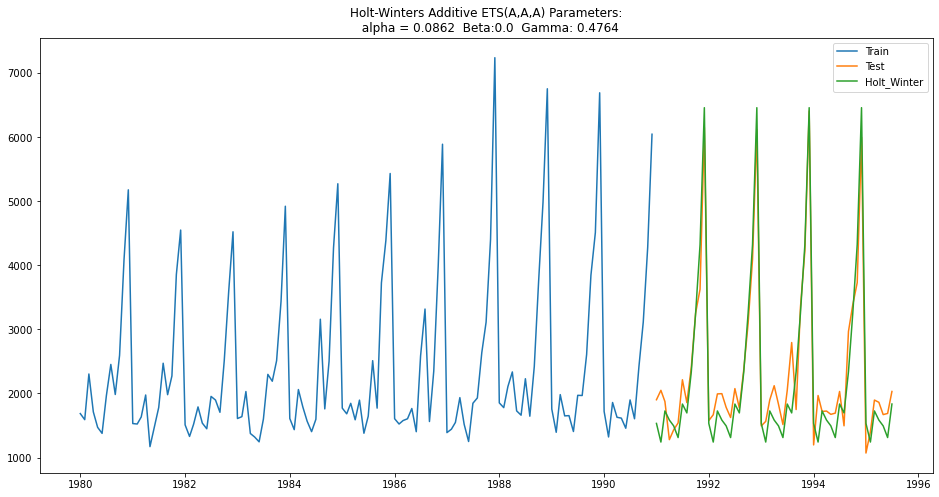

In [100]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [101]:
rmse_opt =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter']))
mape_opt =  MAPE(test['Sparkling'], y_hat_avg['Holt_Winter'])

print("For Holt Winter alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For Holt Winter alpha = 0.09, beta = 0.00, gamma = 0.48, RMSE is 362.7422 MAPE is 12.08


In [102]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE    MAPE
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal  1394.276000   50.11
0               Naive_model  3861.413000  152.17
0            Simple Average  1285.834000   39.22
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081852   38.90
0               Holt_linear  3851.301168  152.07
0               Holt_Winter   362.742174   12.08

### Method 9: Holt-Winters Method - Multiplicative Model

In [103]:
y_hat_avg = test.copy()

In [104]:
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [105]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

#### Plot the predicted Time Series Graph on the Test Data and compare the RMSE and the MAPE to the data frame to compare the model evaluation parameters.

In [106]:
print('')
print('== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==

Smoothing Level:  0.1542
Smoothing Slope:  0.0
Smoothing Seasonal:  0.3713
Initial Level:  1639.9993
Initial Slope:  4.8484
Initial Seasons:  [1.0084 0.969  1.2418 1.1321 0.9398 0.9381 1.2246 1.5443 1.2734 1.632
 2.4829 3.1186]



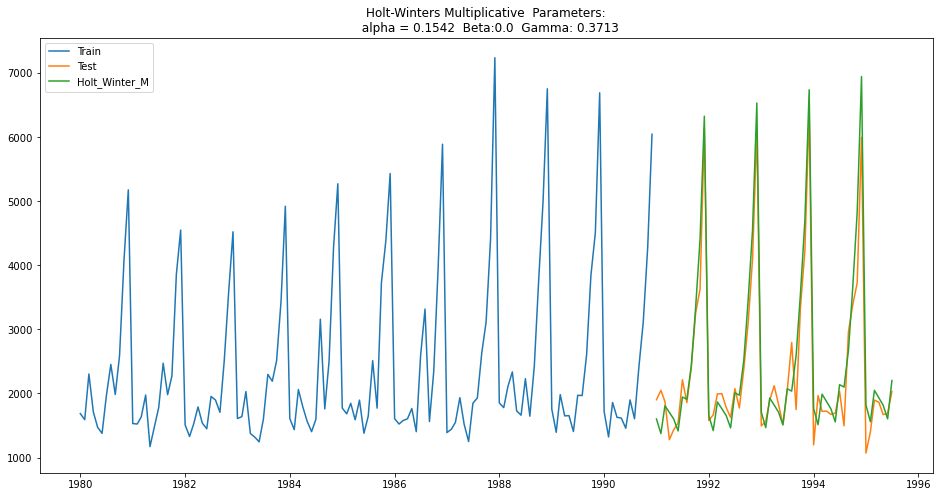

In [107]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [108]:
rmse_opt =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter_M']))
mape_opt =  MAPE(test['Sparkling'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.15, beta = 0.00, gamma = 0.37, RMSE is 383.1765 MAPE is 11.91


In [109]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE    MAPE
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal  1394.276000   50.11
0               Naive_model  3861.413000  152.17
0            Simple Average  1285.834000   39.22
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081852   38.90
0               Holt_linear  3851.301168  152.07
0               Holt_Winter   362.742174   12.08
0             Holt_Winter M   383.176452   11.91

### Inference
As of now, we observe that Moving average of window width of 4 seems to be a good fit for the data.

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the Training Data Time Series.

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

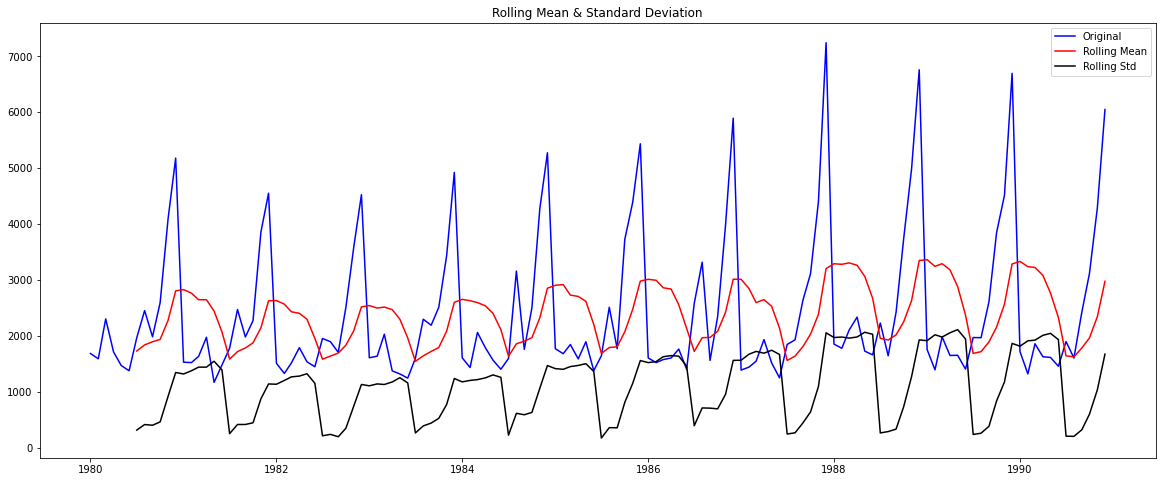

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [110]:
test_stationarity(train['Sparkling'])

#### We see that the series is not stationary at  𝛼  = 0.05.

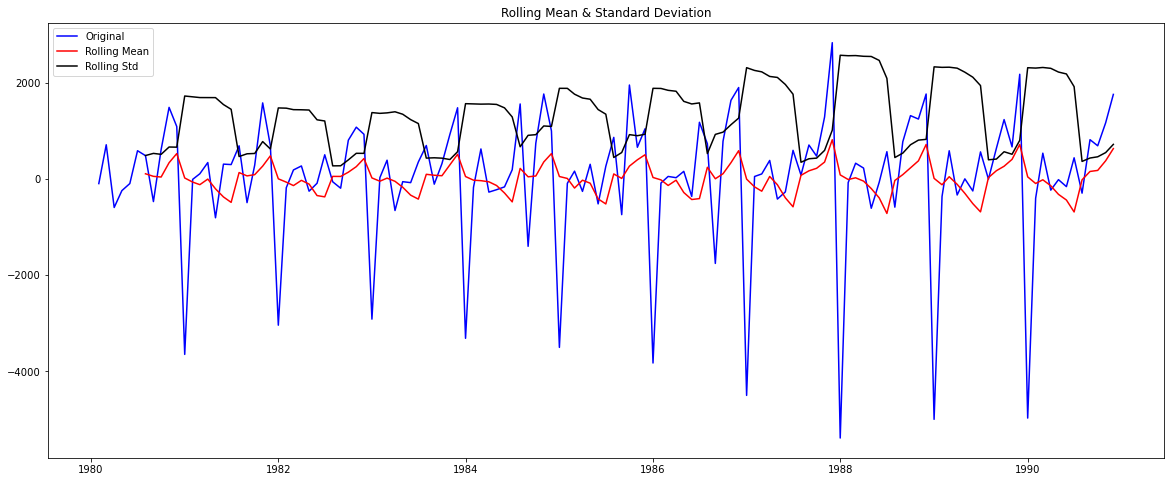

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [111]:
test_stationarity(train['Sparkling'].diff().dropna())

#### We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

- The results show that the test statistic i.e. the p-value is 2.280104e-12 which is <0.05, therefore, we reject the null hypothesis and hence time series is stationary. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).
- Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sparkling               132 non-null    int64  
 1   moving_avg_forecast_4   129 non-null    float64
 2   moving_avg_forecast_6   127 non-null    float64
 3   moving_avg_forecast_8   125 non-null    float64
 4   moving_avg_forecast_12  121 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.2 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Method 10: Auto ARIMA Model

In [113]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [114]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [115]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.7830976843934
ARIMA(0, 1, 3) - AIC:2233.016605137111
ARIMA(1, 1, 0) - AIC:2268.52806058616
ARIMA(1, 1, 1) - AIC:2235.0139453500797
ARIMA(1, 1, 2) - AIC:2233.597647121114
ARIMA(1, 1, 3) - AIC:2234.5741415474026
ARIMA(2, 1, 0) - AIC:2262.0356001527553
ARIMA(2, 1, 1) - AIC:2232.36048987854
ARIMA(2, 1, 2) - AIC:2210.6204882913985
ARIMA(2, 1, 3) - AIC:2229.3580937720503
ARIMA(3, 1, 0) - AIC:2259.4715556215233
ARIMA(3, 1, 1) - AIC:2233.9217649096536
ARIMA(3, 1, 2) - AIC:2228.9271523683483
ARIMA(3, 1, 3) - AIC:2225.661558524889


In [116]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2210.620488
15  (3, 1, 3)  2225.661559
14  (3, 1, 2)  2228.927152
11  (2, 1, 3)  2229.358094
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921765
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471556
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906437
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [117]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1013.051
Date:                Sun, 13 Sep 2020   AIC                           2210.620
Time:                        16:52:12   BIC                           2227.872
Sample:                    02-01-1980   HQIC                          2217.630
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5844      0.518     10.781      0.000       4.569       6.600
ar.L1.D.Sparkling     1.2698      0.075     17.044      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

### Predict on the Test Set using this model and evaluate the model.

In [118]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [119]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
MAPE_auto_ARIMA = MAPE(test['Sparkling'],predicted_auto_ARIMA[0])
print('RMSE:',rmse)
print('MAPE:',MAPE_auto_ARIMA)

RMSE: 1374.3863564598623
MAPE: 48.35


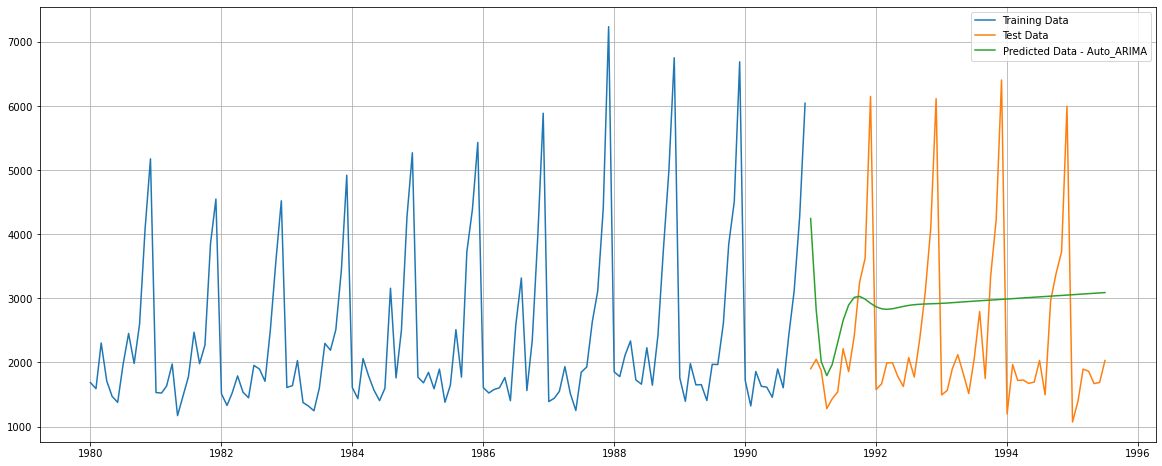

In [120]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - Auto_ARIMA')
plt.legend(loc='best')
plt.grid();

In [121]:
tempResultsDf = pd.DataFrame({'Method': ['Auto_ARIMA(2,1,2)'],'RMSE': [rmse], 'MAPE':[MAPE_auto_ARIMA]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE    MAPE
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal  1394.276000   50.11
0               Naive_model  3861.413000  152.17
0            Simple Average  1285.834000   39.22
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081852   38.90
0               Holt_linear  3851.301168  152.07
0               Holt_Winter   362.742174   12.08
0             Holt_Winter M   383.176452   11.91
0         Auto_ARIMA(2,1,2)  1374.386356   48.35

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Method 11: Manual ARIMA Model

Let us look at the ACF and the PACF plots once more.

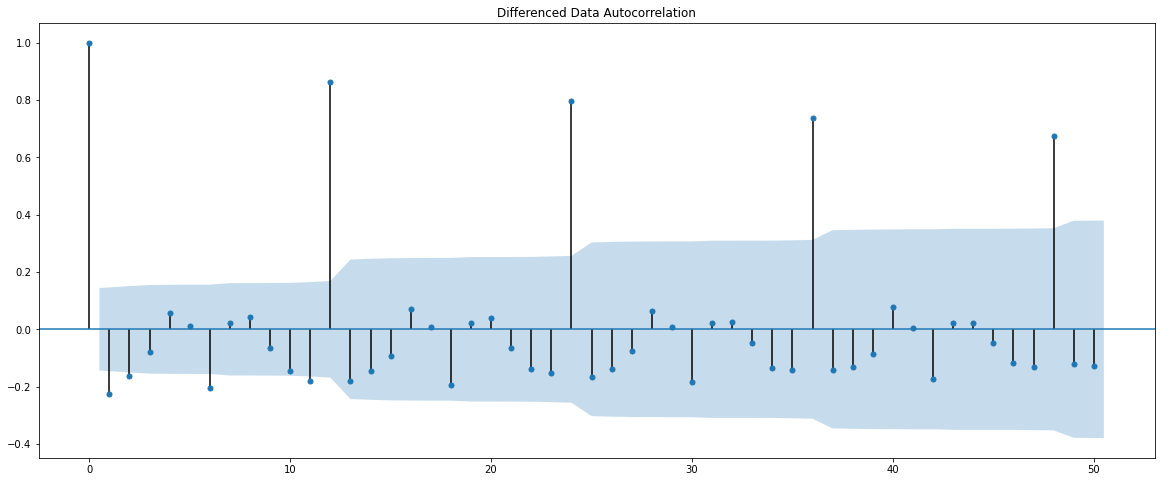

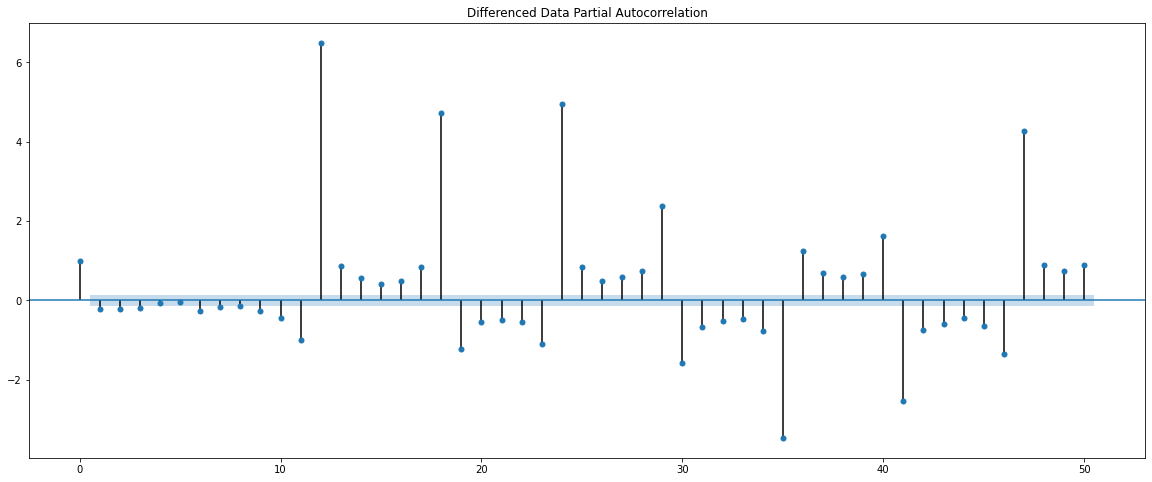

In [122]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Inference:

Here, we have taken alpha = 0.05.

- The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
- The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.
- By looking at the above plots, we can say that the PACF plot cuts-off at lag 3 and ACF plot cuts-off at lag 2.

In [123]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.010
Date:                Sun, 13 Sep 2020   AIC                           2228.927
Time:                        16:52:17   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.105
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9850        nan        nan        nan         nan         nan
ar.L1.D.Sparkling    -0.4419        nan        nan        nan         nan         nan
ar.L2.D.Sparkling     0.

We get a comparatively simpler model by looking at the ACF and the PACF plots.

### Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [125]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
MAPE_manual_ARIMA = MAPE(test['Sparkling'],predicted_manual_ARIMA[0])
print('RMSE:',rmse)
print('MAPE:',MAPE_manual_ARIMA)

RMSE: 1378.9279400921973
MAPE: 49.31


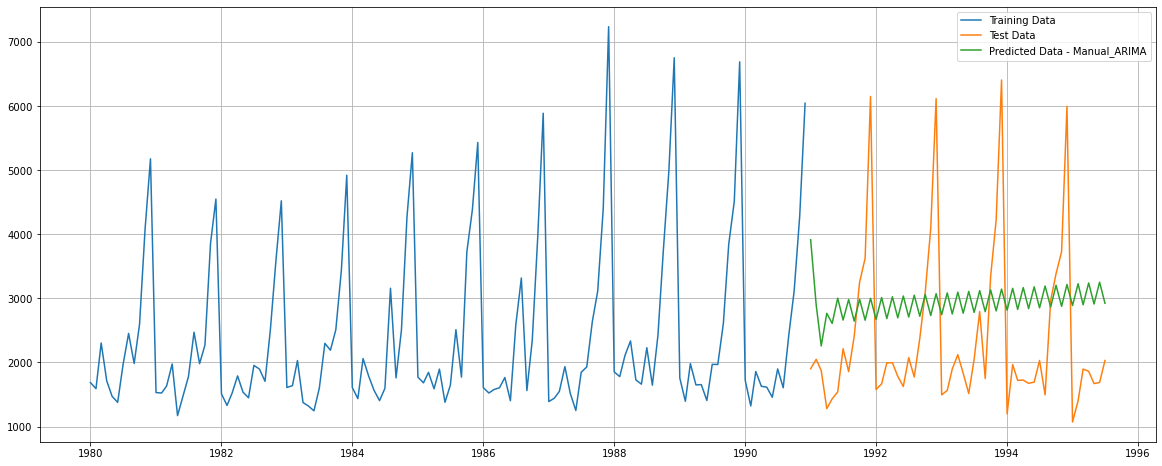

In [126]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - Manual_ARIMA')
plt.legend(loc='best')
plt.grid();

In [127]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_ARIMA(3,1,2)'],'RMSE': [rmse], 'MAPE':[MAPE_manual_ARIMA]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE    MAPE
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal  1394.276000   50.11
0               Naive_model  3861.413000  152.17
0            Simple Average  1285.834000   39.22
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081852   38.90
0               Holt_linear  3851.301168  152.07
0               Holt_Winter   362.742174   12.08
0             Holt_Winter M   383.176452   11.91
0         Auto_ARIMA(2,1,2)  1374.386356   48.35
0       Manual_ARIMA(3,1,2)  1378.927940   49.31

We see that the difference in RMSE values is about 4 with a manual model built.

### Method 12: Auto SARIMA Model_6

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

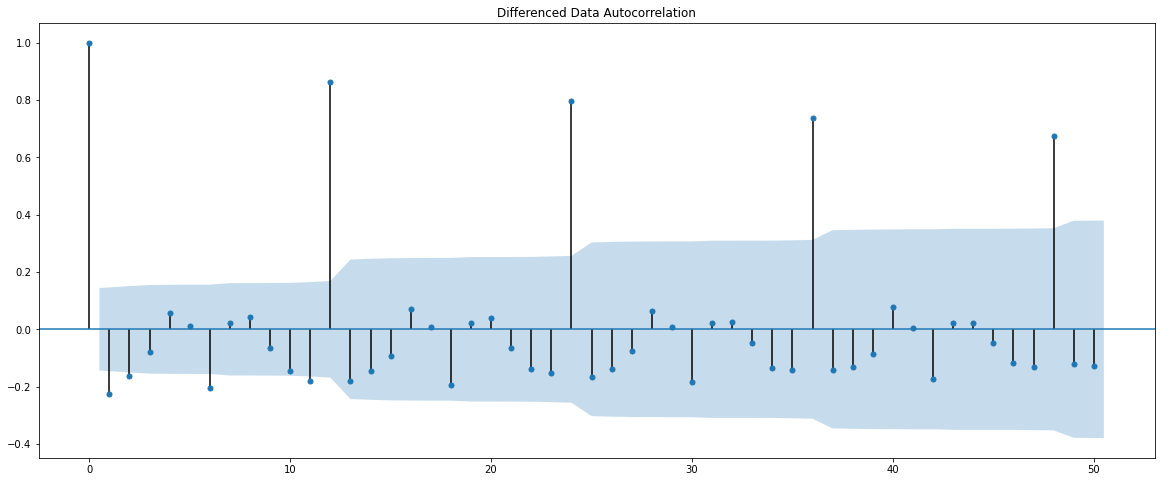

In [128]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### Inference:
- We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [129]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [130]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [131]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.635553688828
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.5599844430694
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.9360122627156
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993617510839
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.9177805656493
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:2130.56528590828
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1918.187633954211
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:2139.5732428780643
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:2006.5174298138518
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1855.7093274085794
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1798.7885104030818
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1800.771793314988
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1741.6964517124866
SARIMA(0, 1, 2)x(0

In [132]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.670869
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888804
80  (2, 1, 2)  (2, 0, 2, 6)  1729.363553
17  (0, 1, 1)  (2, 0, 2, 6)  1741.696452
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379779

In [133]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 13 Sep 2020   AIC                           1727.671
Time:                                   16:56:14   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6453      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3355      0.228     -1.474

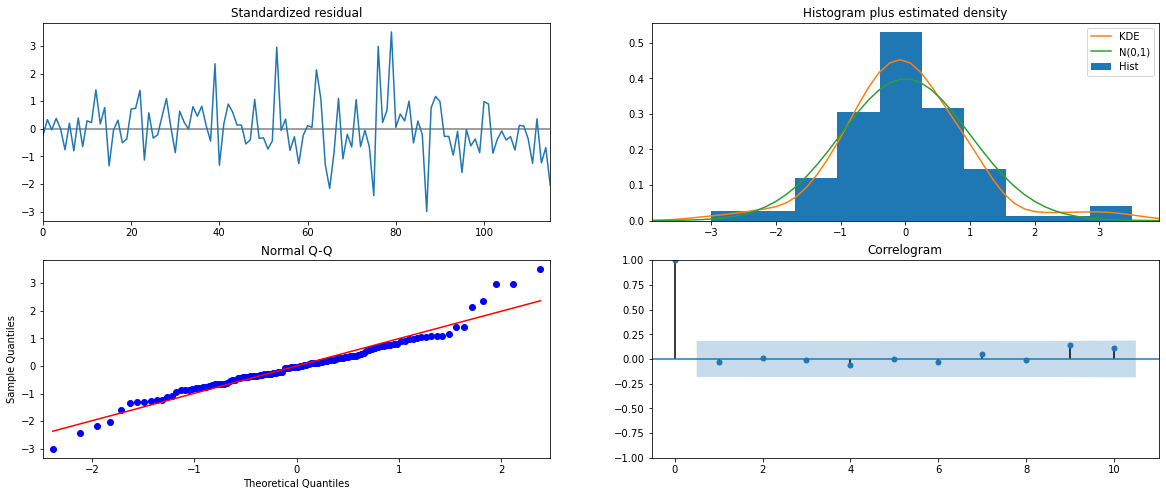

In [134]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [135]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [136]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.435260  380.525136     584.619699    2076.250821
1  1177.207598  392.062348     408.779516    1945.635681
2  1625.909901  392.257392     857.099540    2394.720262
3  1546.403533  397.657868     767.008434    2325.798631
4  1308.676527  398.877169     526.891641    2090.461414

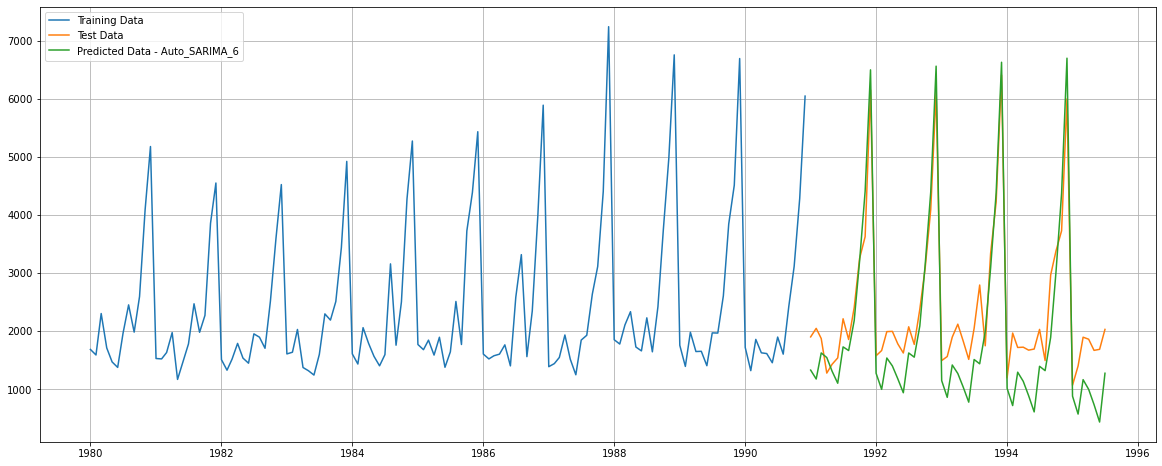

In [137]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean,label='Predicted Data - Auto_SARIMA_6')
plt.legend(loc='best')
plt.grid();

In [138]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
MAPE_auto_SARIMA_6 = MAPE(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_auto_SARIMA_6)

RMSE: 626.8772381455102
MAPE: 22.55


In [139]:
temp_resultsDf = pd.DataFrame({'Method': ['Auto_SARIMA(1,1,2)(2,0,2,6)'], 'RMSE': [rmse], 'MAPE':[MAPE_auto_SARIMA_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE    MAPE
0             RegressionOnTime  1389.135000   50.15
0     RegressionOnTimeSeasonal  1394.276000   50.11
0                  Naive_model  3861.413000  152.17
0               Simple Average  1285.834000   39.22
0        moving_avg_forecast_4  1156.590000   35.96
0        moving_avg_forecast_6  1283.927000   43.86
0        moving_avg_forecast_8  1342.568000   46.46
0       moving_avg_forecast_12  1267.925000   40.19
0                          SES  1275.081852   38.90
0                  Holt_linear  3851.301168  152.07
0                  Holt_Winter   362.742174   12.08
0                Holt_Winter M   383.176452   11.91
0            Auto_ARIMA(2,1,2)  1374.386356   48.35
0          Manual_ARIMA(3,1,2)  1378.927940   49.31
0  Auto_SARIMA(1,1,2)(2,0,2,6)   626.877238   22.55

#### We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Method 13: Auto SARIMA Model_12

Setting the seasonality as 12 for the first iteration of the auto SARIMA model.


In [140]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [141]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [142]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616845283
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640236833
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389053
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791792
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158601686
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920776
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566446
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572824402
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838416
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.0903193748916
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1509147839727
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954176714
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245083887813
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.4018824

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.929655
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [144]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 13 Sep 2020   AIC                           1555.584
Time:                                    16:59:43   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

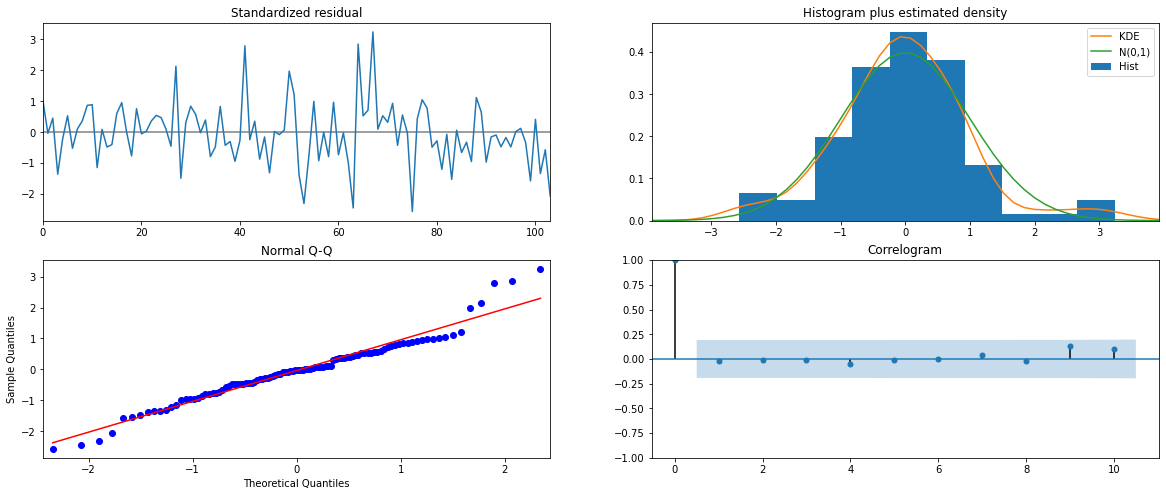

In [145]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [146]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [147]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.366346  388.347882     566.218484    2088.514207
1  1315.107588  402.012250     527.178055    2103.037120
2  1621.573014  402.005858     833.656011    2409.490016
3  1598.859794  407.244109     800.676008    2397.043580
4  1392.677058  407.974213     593.062294    2192.291821

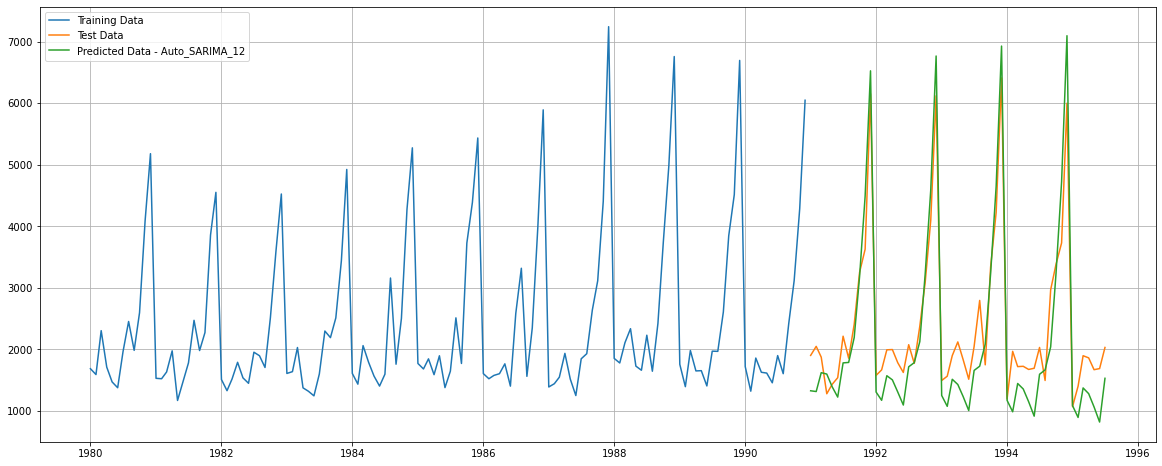

In [148]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted Data - Auto_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [149]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
MAPE_auto_SARIMA_12 = MAPE(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_auto_SARIMA_12)


RMSE: 528.6299166392437
MAPE: 18.89


In [150]:
temp_resultsDf = pd.DataFrame({'Method':['Auto_SARIMA(1,1,2)(1,0,2,12)'],'RMSE': [rmse],'MAPE':[MAPE_auto_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE    MAPE
0              RegressionOnTime  1389.135000   50.15
0      RegressionOnTimeSeasonal  1394.276000   50.11
0                   Naive_model  3861.413000  152.17
0                Simple Average  1285.834000   39.22
0         moving_avg_forecast_4  1156.590000   35.96
0         moving_avg_forecast_6  1283.927000   43.86
0         moving_avg_forecast_8  1342.568000   46.46
0        moving_avg_forecast_12  1267.925000   40.19
0                           SES  1275.081852   38.90
0                   Holt_linear  3851.301168  152.07
0                   Holt_Winter   362.742174   12.08
0                 Holt_Winter M   383.176452   11.91
0             Auto_ARIMA(2,1,2)  1374.386356   48.35
0           Manual_ARIMA(3,1,2)  1378.927940   49.31
0   Auto_SARIMA(1,1,2)(2,0,2,6)   626.877238   22.55
0  Auto_SARIMA(1,1,2)(1,0,2,12)   528.629917   18.89

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

### Method 14: Manual SARIMA model_6

Let us look at the ACF and the PACF plots once more.

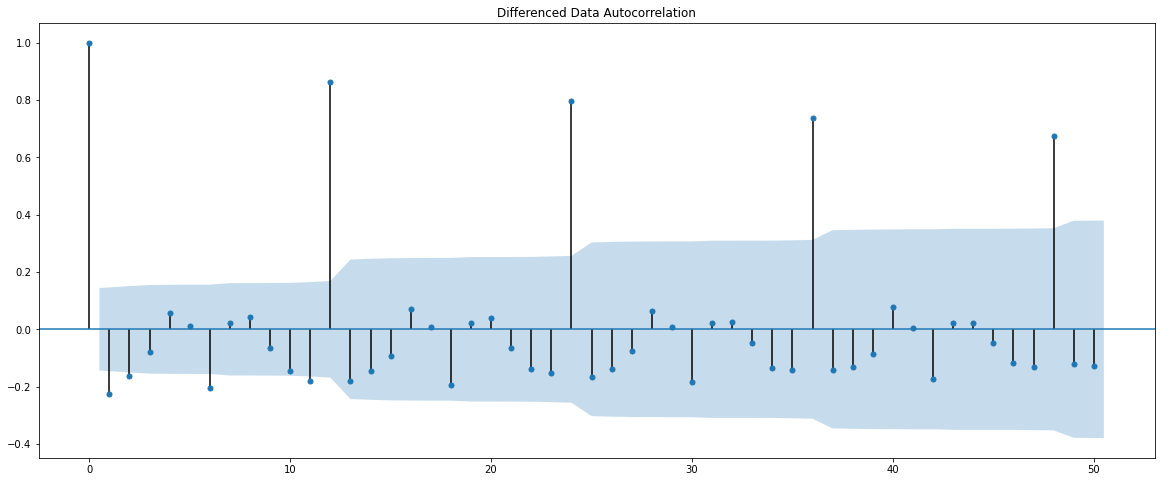

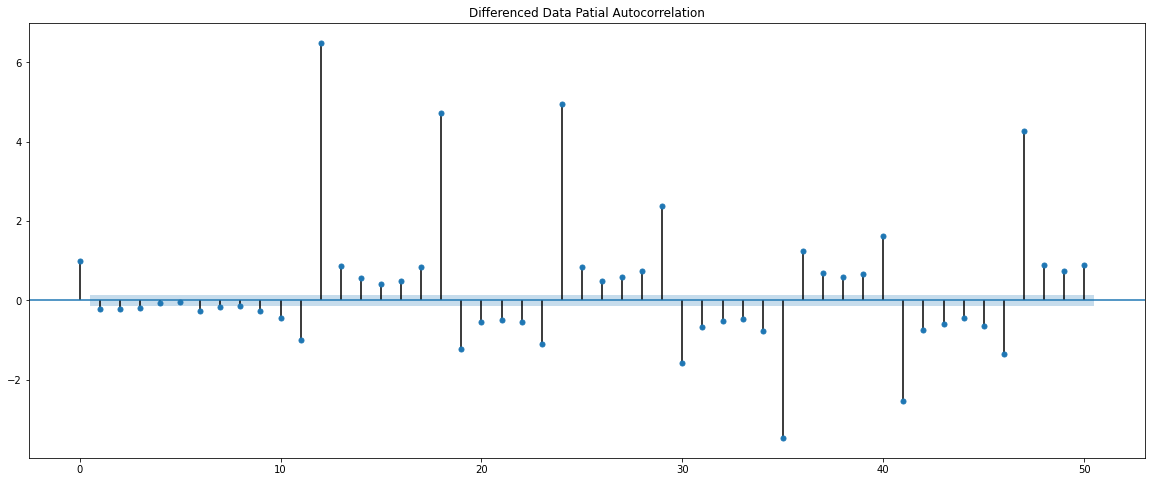

In [151]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

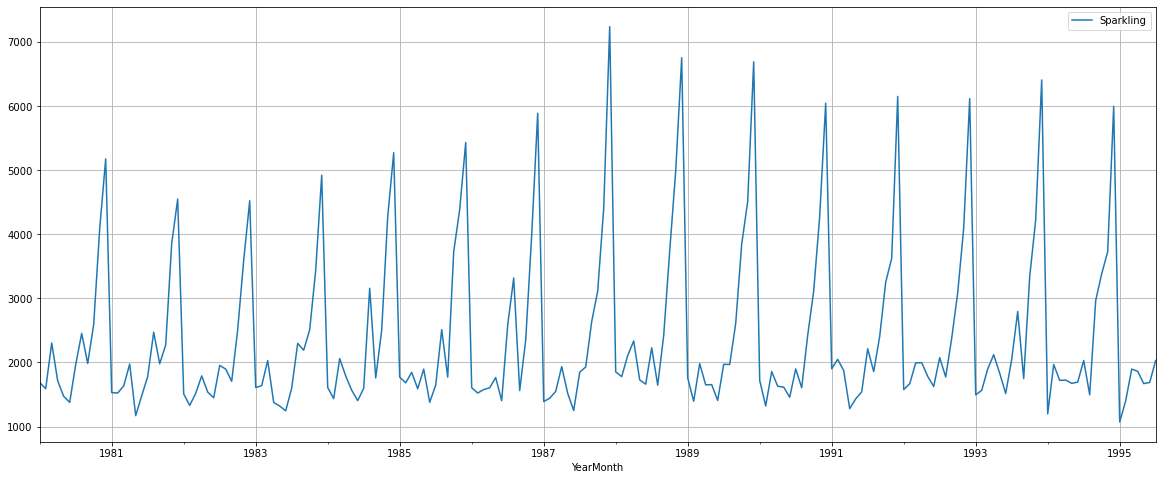

In [152]:
df.plot()
plt.grid();

We see that there is a slight trend and a seasonality. So, now we take a seasonal differencing and check the series.

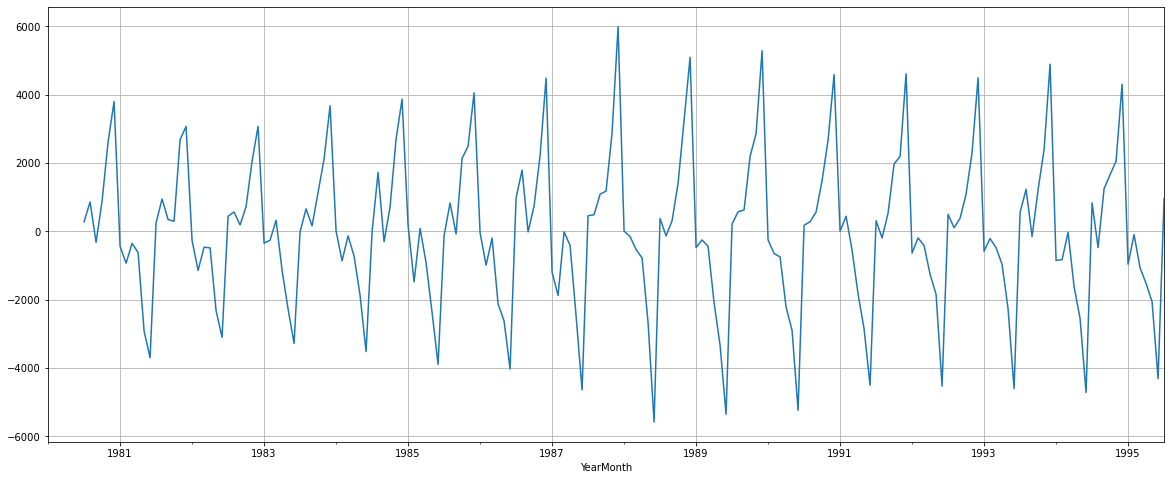

In [153]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

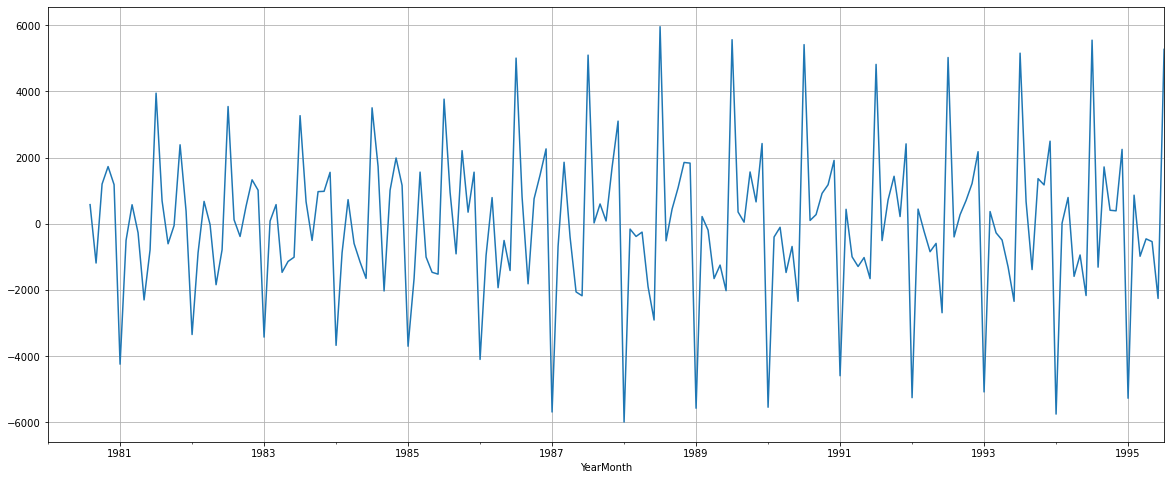

In [154]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

#### Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

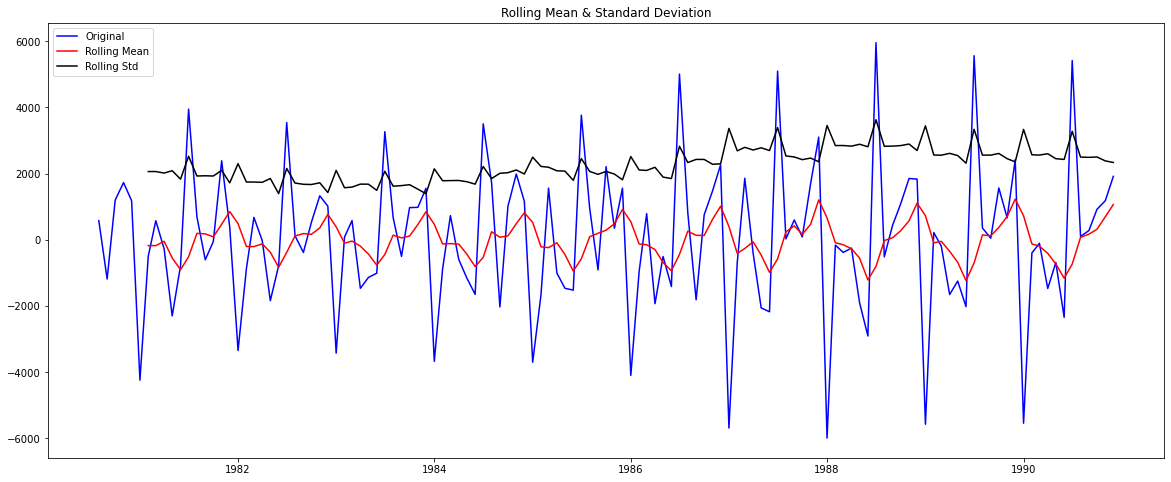

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [155]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

#### Checking the ACF and the PACF plots for the new modified Time Series.

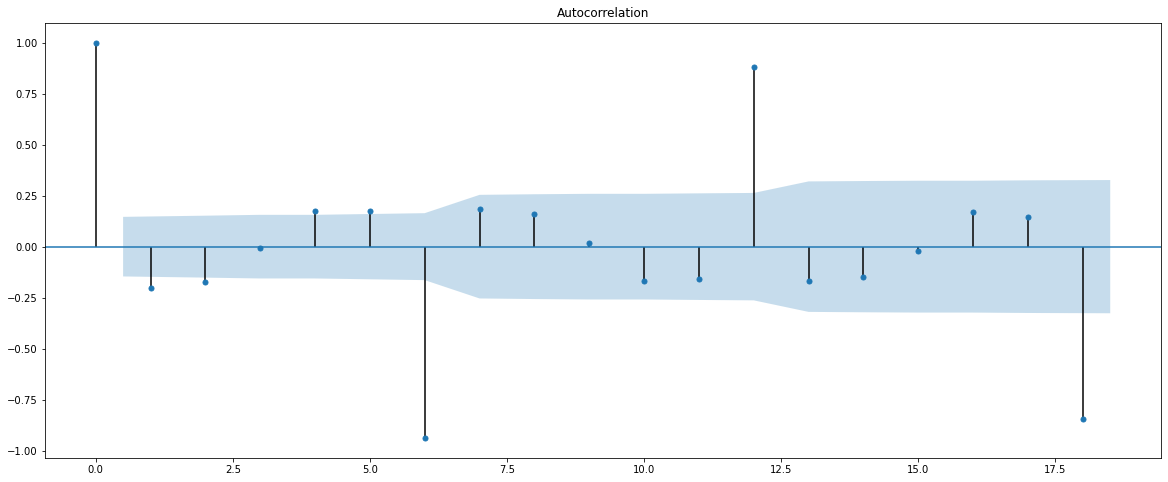

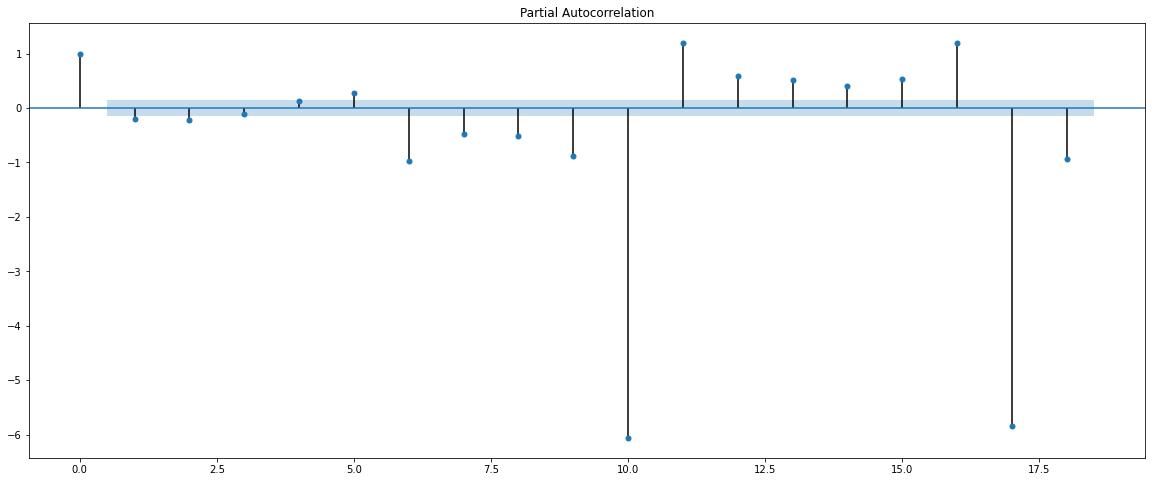

In [156]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=18);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the lag at which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0. 
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

In [157]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(2, 1,2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 6)   Log Likelihood                -821.646
Date:                                Sun, 13 Sep 2020   AIC                           1657.293
Time:                                        17:00:50   BIC                           1676.260
Sample:                                             0   HQIC                          1664.987
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1365      0.116      1.177      0.239      -0.091       0.364
ma.

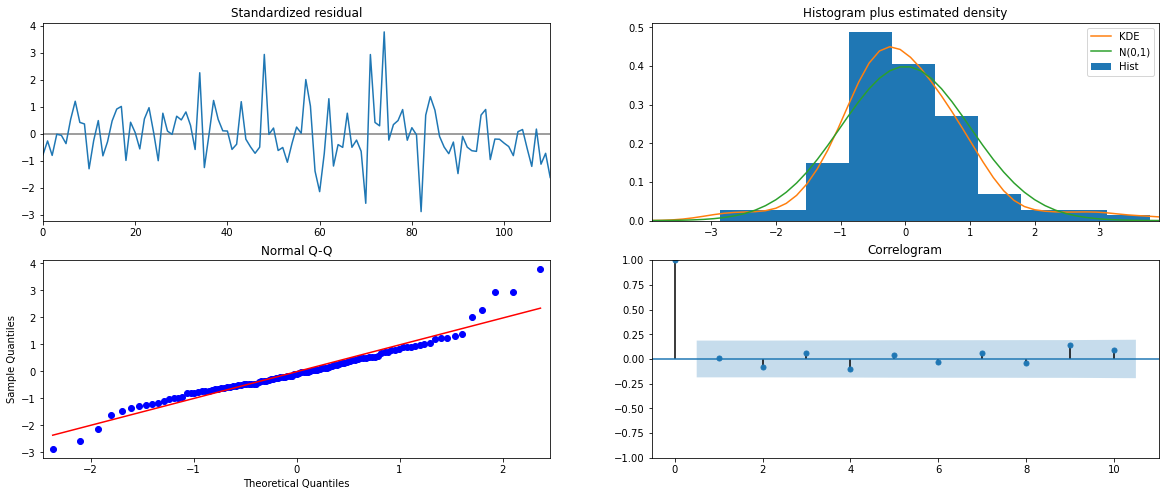

In [158]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

### Predict on the Test Set using this model and evaluate the model.

In [159]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [160]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1473.662020  393.003227     703.389851    2243.934190
1  1149.607307  401.902156     361.893555    1937.321059
2  1792.041550  404.087669    1000.044271    2584.038828
3  1601.689982  405.706998     806.518877    2396.861087
4  1375.577786  407.250746     577.380992    2173.774580

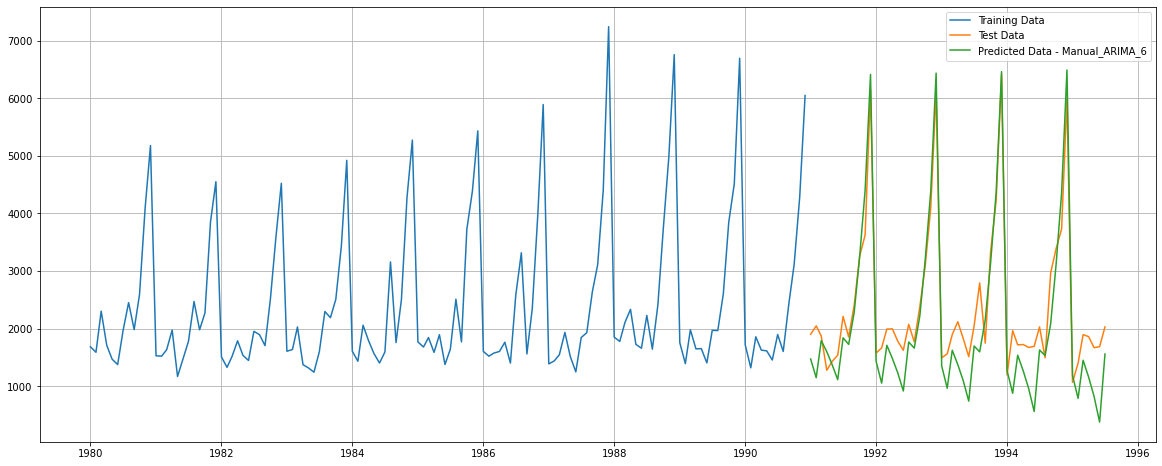

In [161]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_6.predicted_mean,label='Predicted Data - Manual_ARIMA_6')
plt.legend(loc='best')
plt.grid();

In [162]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
MAPE_manual_SARIMA_6 = MAPE(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_manual_SARIMA_6)

RMSE: 547.745552622476
MAPE: 18.52


In [163]:
temp_resultsDf = pd.DataFrame({'Method':['Manual_SARIMA(1,1,1)(2,1,2,6)'],'RMSE': [rmse],'MAPE':[MAPE_manual_SARIMA_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE    MAPE
0               RegressionOnTime  1389.135000   50.15
0       RegressionOnTimeSeasonal  1394.276000   50.11
0                    Naive_model  3861.413000  152.17
0                 Simple Average  1285.834000   39.22
0          moving_avg_forecast_4  1156.590000   35.96
0          moving_avg_forecast_6  1283.927000   43.86
0          moving_avg_forecast_8  1342.568000   46.46
0         moving_avg_forecast_12  1267.925000   40.19
0                            SES  1275.081852   38.90
0                    Holt_linear  3851.301168  152.07
0                    Holt_Winter   362.742174   12.08
0                  Holt_Winter M   383.176452   11.91
0              Auto_ARIMA(2,1,2)  1374.386356   48.35
0            Manual_ARIMA(3,1,2)  1378.927940   49.31
0    Auto_SARIMA(1,1,2)(2,0,2,6)   626.877238   22.55
0   Auto_SARIMA(1,1,2)(1,0,2,12)   528.629917   18.89
0  Manual_SARIMA(1,1,1)(2,1,2,6)   547.745553   18.52

### Method 15: Manual SARIMA model_12

Let us look at the ACF and the PACF plots once more.

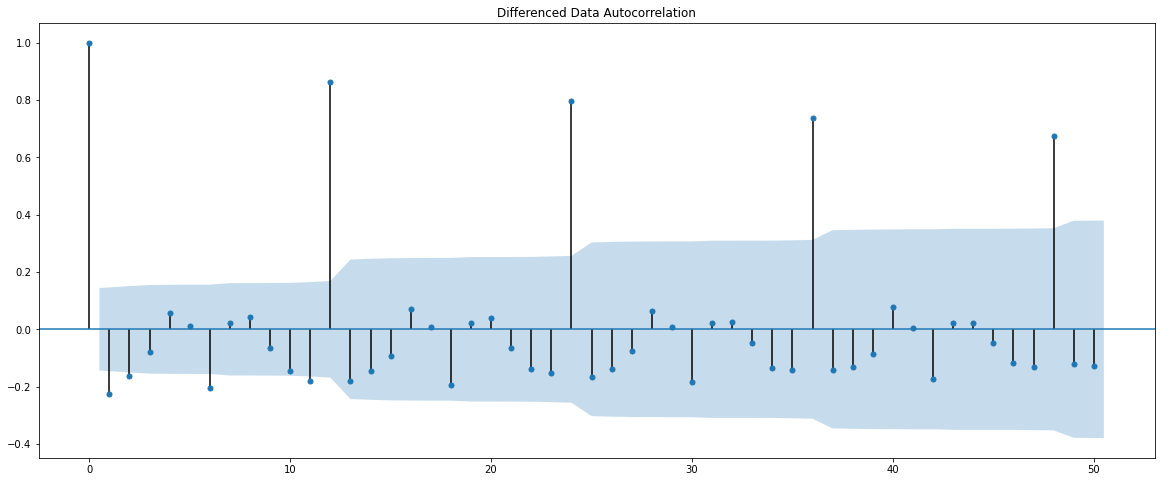

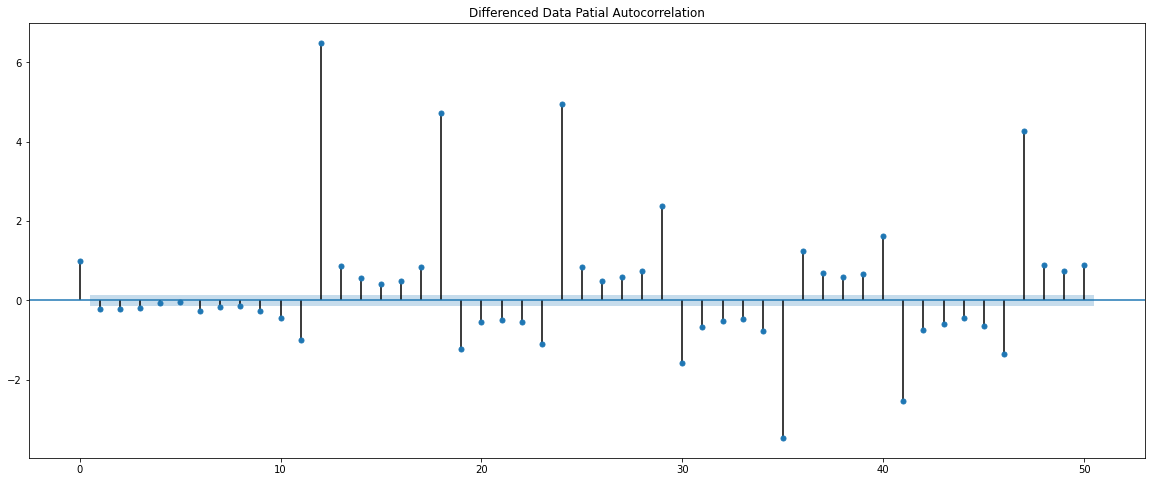

In [164]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

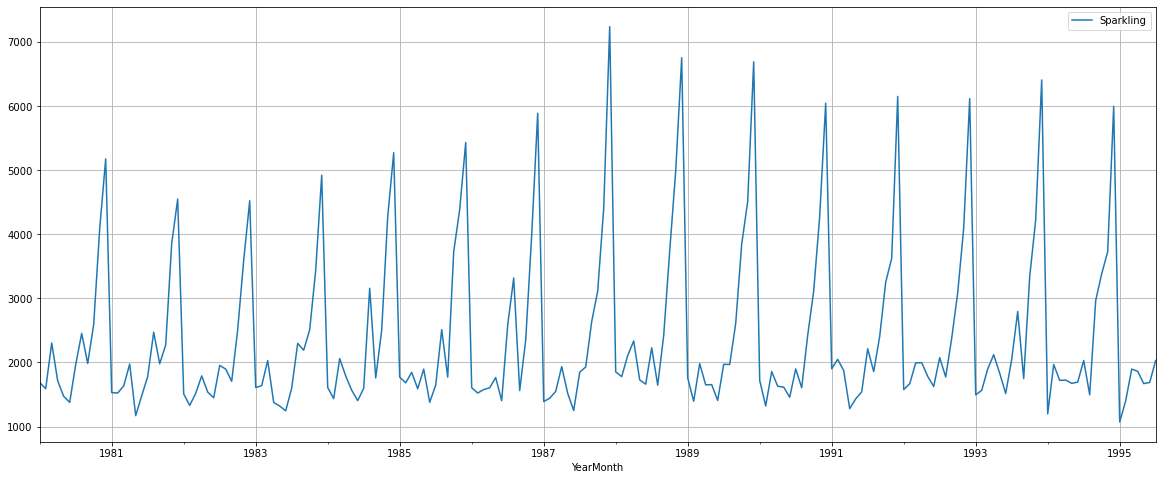

In [165]:
df.plot()
plt.grid();

We see that there is a slight trend and a seasonality. So, now we take a seasonal differencing and check the series.

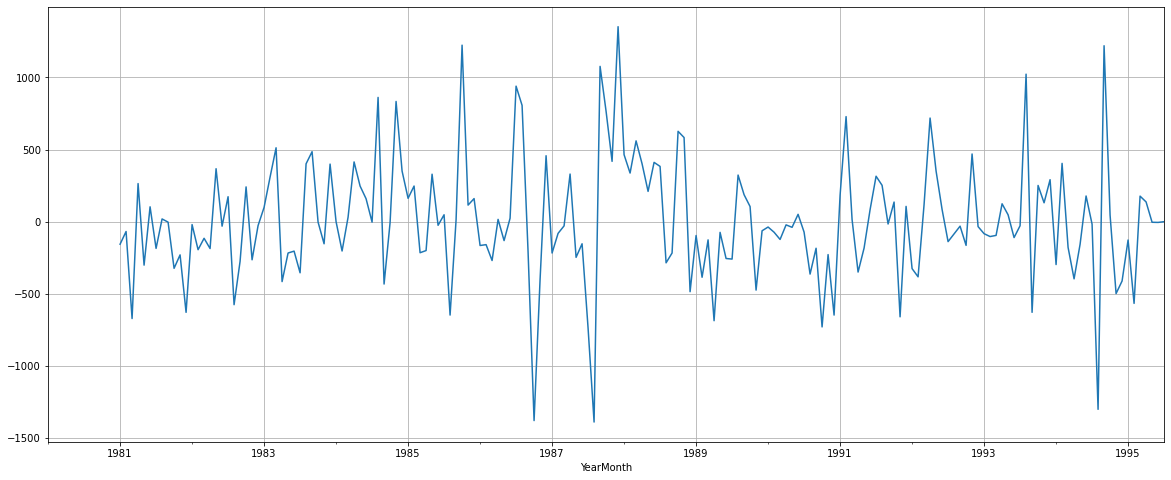

In [166]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

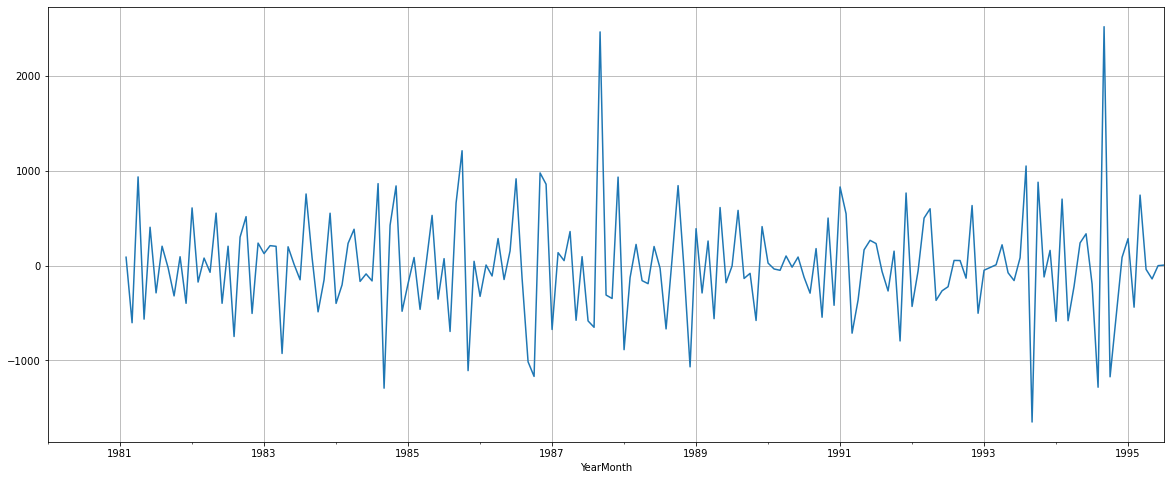

In [167]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

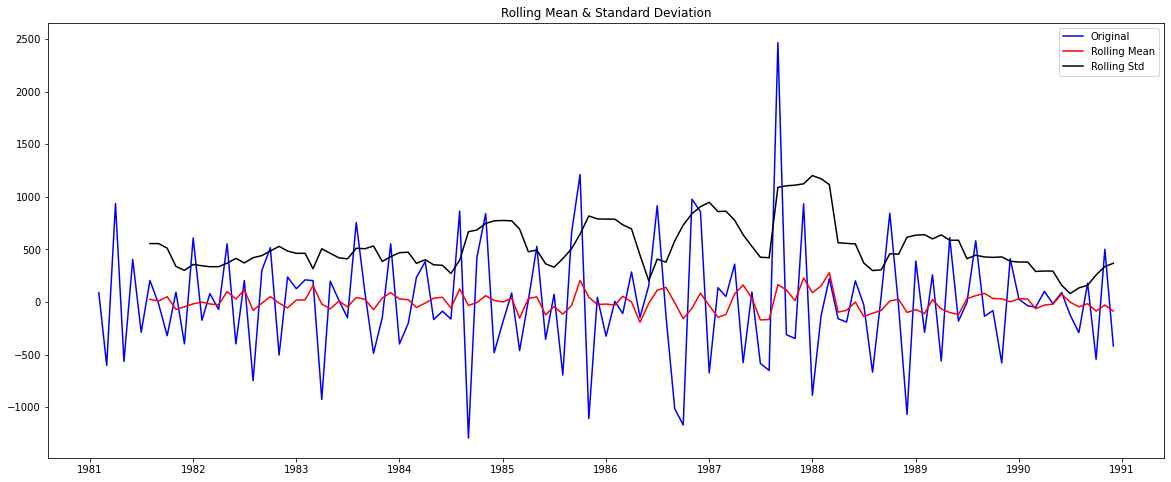

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [168]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

#### Checking the ACF and the PACF plots for the new modified Time Series.

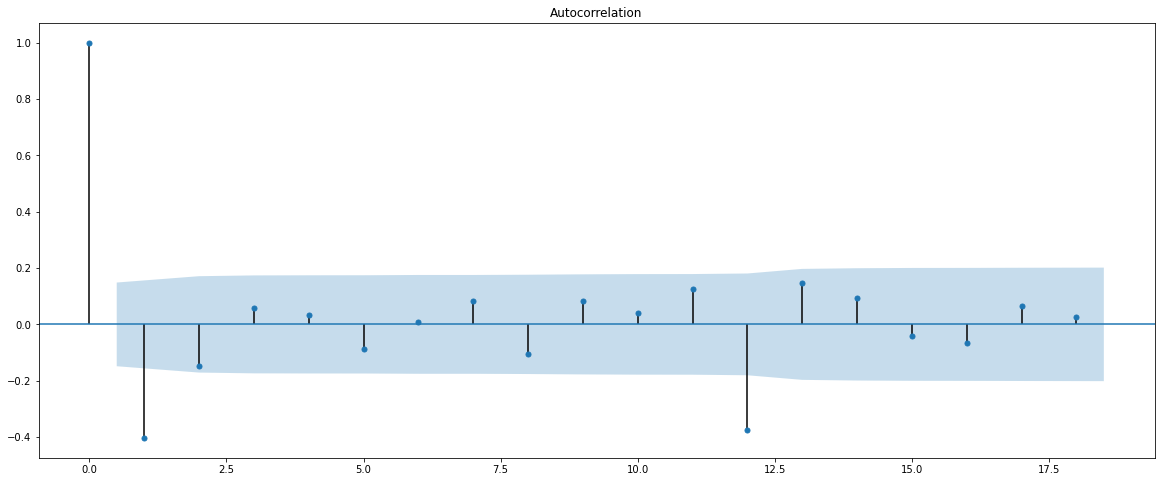

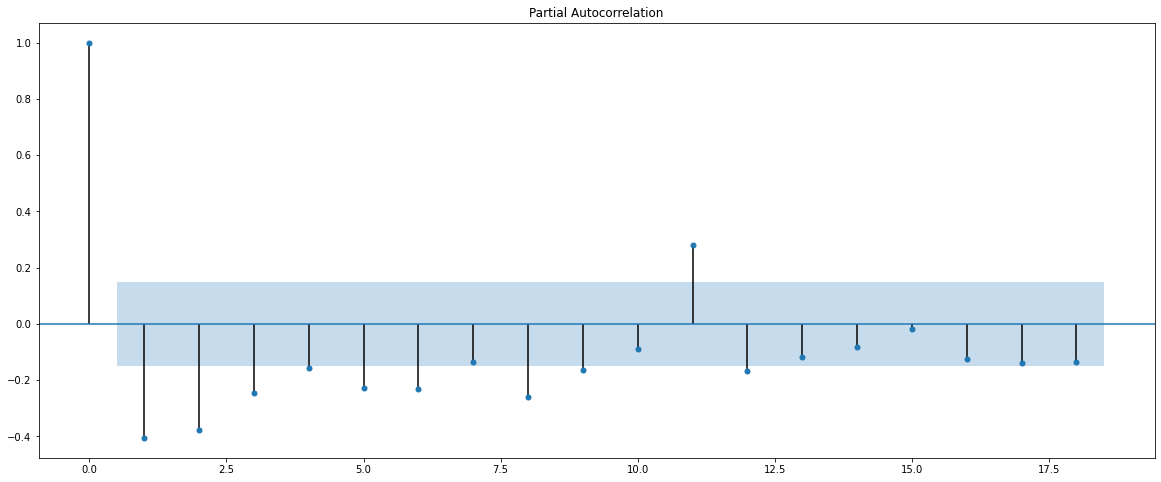

In [169]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=18);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the lag at which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0. 
Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

In [170]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -332.541
Date:                              Sun, 13 Sep 2020   AIC                            689.082
Time:                                      17:03:13   BIC                            710.762
Sample:                                           0   HQIC                           697.164
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5748      0.251     -2.292      0.022      -1.066      -0.083
ar.L2          0.16

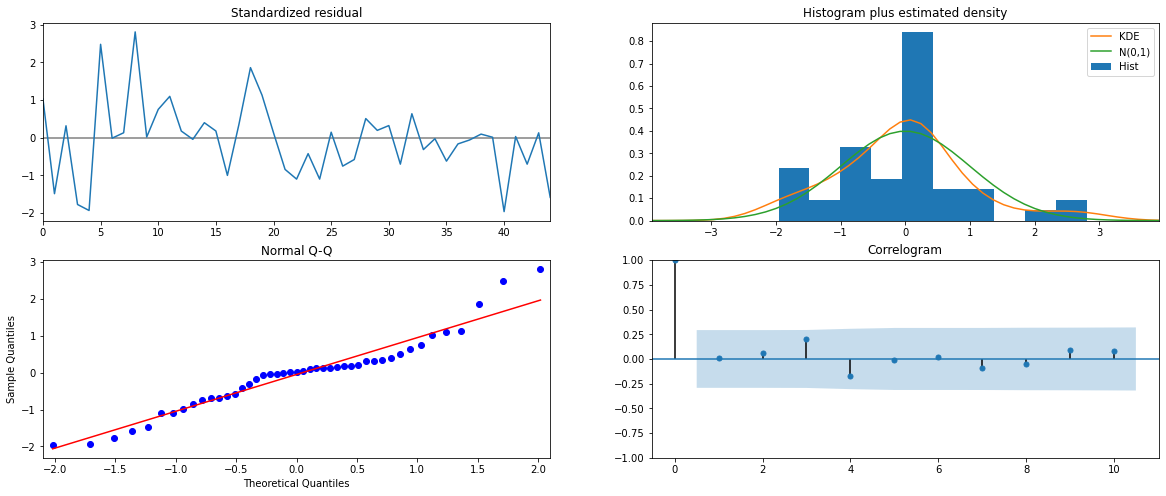

In [171]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

### Predict on the Test Set using this model and evaluate the model.

In [172]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [173]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1636.574113  366.935574     917.393604    2355.754622
1  1667.514390  399.469541     884.568477    2450.460303
2  1990.797991  399.321102    1208.143013    2773.452969
3  1854.877228  402.086369    1066.802427    2642.952030
4  1774.226983  402.201466     985.926595    2562.527370

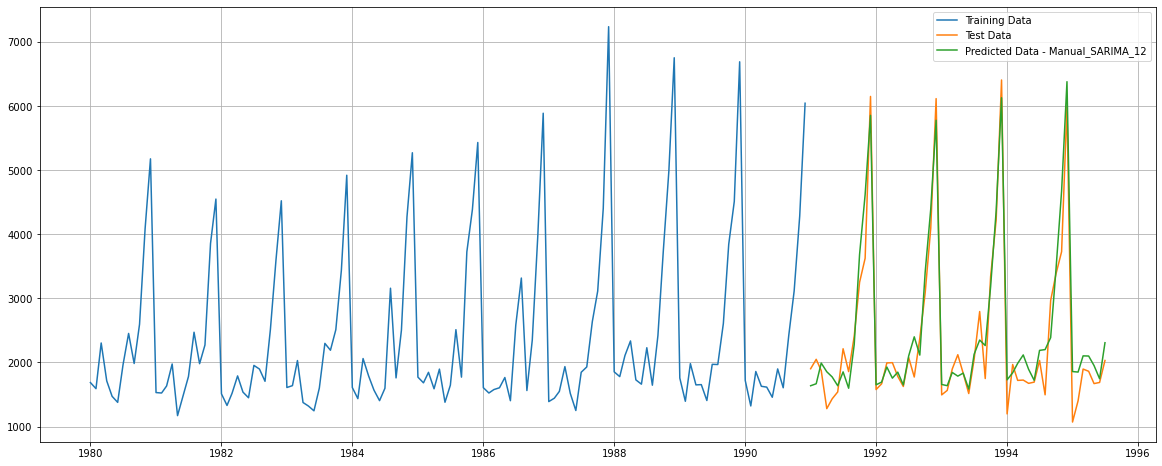

In [174]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_12.predicted_mean,label='Predicted Data - Manual_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [175]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
MAPE_manual_SARIMA_12 = MAPE(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_manual_SARIMA_12)

RMSE: 364.76598481914493
MAPE: 11.86


### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

### Mean Absolute Percentage Error:
- This is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management,  [0,+∞) 
- MAPE=100n∑i=1n|yi−y^i|yi

In [176]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_SARIMA(2,1,2)(6,1,1,12)'],'RMSE': [rmse],'MAPE':[MAPE_manual_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE    MAPE
0                RegressionOnTime  1389.135000   50.15
0        RegressionOnTimeSeasonal  1394.276000   50.11
0                     Naive_model  3861.413000  152.17
0                  Simple Average  1285.834000   39.22
0           moving_avg_forecast_4  1156.590000   35.96
0           moving_avg_forecast_6  1283.927000   43.86
0           moving_avg_forecast_8  1342.568000   46.46
0          moving_avg_forecast_12  1267.925000   40.19
0                             SES  1275.081852   38.90
0                     Holt_linear  3851.301168  152.07
0                     Holt_Winter   362.742174   12.08
0                   Holt_Winter M   383.176452   11.91
0               Auto_ARIMA(2,1,2)  1374.386356   48.35
0             Manual_ARIMA(3,1,2)  1378.927940   49.31
0     Auto_SARIMA(1,1,2)(2,0,2,6)   626.877238   22.55
0    Auto_SARIMA(1,1,2)(1,0,2,12)   528.629917   18.89
0   Manual_SARIMA(1,1,1)(2,1,2,6)   547.745553   18.52
0  Manual_SARIMA(2,1,2)(6,1,1,12)   364.765985   11.86

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Building the most optimum model on the Full Data.

In [177]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -735.450
Date:                              Sun, 13 Sep 2020   AIC                           1494.900
Time:                                      17:05:11   BIC                           1526.162
Sample:                                  01-01-1980   HQIC                          1507.552
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8517      0.125     -6.814      0.000      -1.097      -0.607
ar.L2          0.05

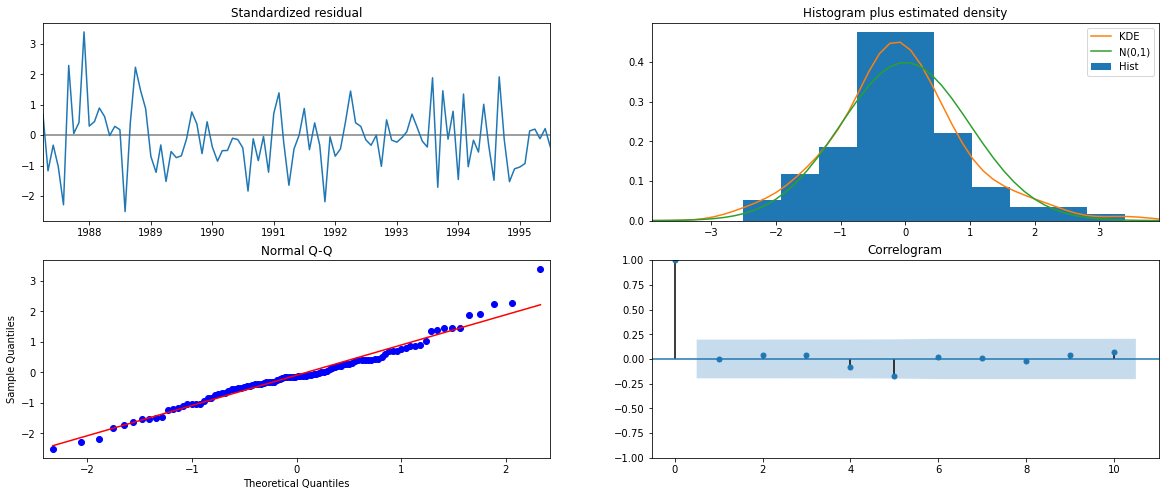

In [178]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [179]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [180]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head(12)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1665.945498  373.962947     932.991591    2398.899406
1995-09-01  2581.675661  380.212526    1836.472803    3326.878519
1995-10-01  3264.898007  380.224968    2519.670764    4010.125250
1995-11-01  4005.926882  382.297884    3256.636799    4755.216966
1995-12-01  6005.683287  382.295878    5256.397135    6754.969439
1996-01-01  1222.132077  384.006522     469.493123    1974.771031
1996-02-01  1364.587584  384.005163     611.951294    2117.223874
1996-03-01  1839.780611  385.442382    1084.327423    2595.233798
1996-04-01  1716.966754  385.461019     961.477038    2472.456469
1996-05-01  1644.865104  386.691381     886.963925    2402.766283
1996-06-01  1503.601572  386.740497     745.604126    2261.599017
1996-07-01  1915.795053  387.809647    1155.702111    2675.887995

In [181]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
MAPE_fulldata_SARIMA_12 = MAPE(df['Sparkling'],results_full_data_model.fittedvalues)
print('RMSE of the Full Model',rmse)
print('MAPE of manual_SARIMA_12_full_data:',MAPE_fulldata_SARIMA_12)

RMSE of the Full Model 618.9984872246131
MAPE of manual_SARIMA_12_full_data: 16.63


In [182]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

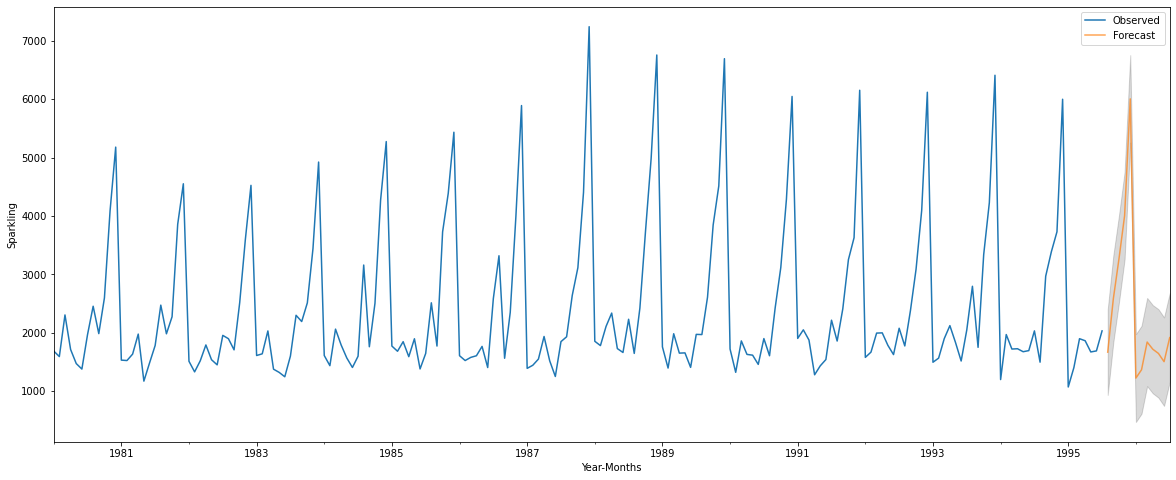

In [183]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

#### We see that we have certainly been able to take advantage of seasonality to get a better prediction with thinner confidence intervals. We saw that differencing on the seasonal scale helped make the model more accurate on the test data.

In [184]:
temp_resultsDf = pd.DataFrame({'Method':['Fulldata_Manual_SARIMA(2,1,2)(6,1,1,12)'],'RMSE': [rmse], 'MAPE':[MAPE_fulldata_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE    MAPE
0                         RegressionOnTime  1389.135000   50.15
0                 RegressionOnTimeSeasonal  1394.276000   50.11
0                              Naive_model  3861.413000  152.17
0                           Simple Average  1285.834000   39.22
0                    moving_avg_forecast_4  1156.590000   35.96
0                    moving_avg_forecast_6  1283.927000   43.86
0                    moving_avg_forecast_8  1342.568000   46.46
0                   moving_avg_forecast_12  1267.925000   40.19
0                                      SES  1275.081852   38.90
0                              Holt_linear  3851.301168  152.07
0                              Holt_Winter   362.742174   12.08
0                            Holt_Winter M   383.176452   11.91
0                        Auto_ARIMA(2,1,2)  1374.386356   48.35
0                      Manual_ARIMA(3,1,2)  1378.927940   49.31
0              Auto_SARIMA(1,1,2)(2,0,2,6)   626.877238   22.55
0             Auto_SARIMA(1,1,2)(1,0,2,12)   528.629917   18.89
0            Manual_SARIMA(1,1,1)(2,1,2,6)   547.745553   18.52
0           Manual_SARIMA(2,1,2)(6,1,1,12)   364.765985   11.86
0  Fulldata_Manual_SARIMA(2,1,2)(6,1,1,12)   618.998487   16.63

### Inference
As of now, we observe that Manual_SARIMA(2,1,2)(6,1,1,12)and Holt_Winter M seems to be a good fit for the data, since the RMSE (364.7, 362.7) value and MAPE (11.86,11.91) respectively is low compared to other models.

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Comment on our Final Model (Manual_SARIMA(2,1,2)(6,1,1,12))
The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we’ll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:
- In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

- Measures that the company should be taking for future sales.

Since there is no trend but seasonality. The company's wine sales would be high in November and December in future years according to the model prediction.

The company needs to improve their sales in rest of the months.

Wine selections on the menu should include more than the region of origin, the type and the year. Select words like fruity, bold, earthy, light, sweet, dry and dessert to describe the actual taste. It will help customers narrow the options and increase sales. 

Try giving your customers opportunities to try selections with these simple strategies: 

- Open up the bar for tasting events. You don't have to offer samples of every wine, but occasionally opening up the bar for a wine tasting or wine pairing event can bring in customers on a slow night. 
- Bring in a few bottles of something new every month. Promote these selections to your email list. Invite them in for a special glass of your featured wine. 
- Always have a featured wine. Pair it with a signature or special dish and make it a special for the week or month. Don’t forget to share it with your customers on Facebook.

### The End